# trying different classifiers for category classification
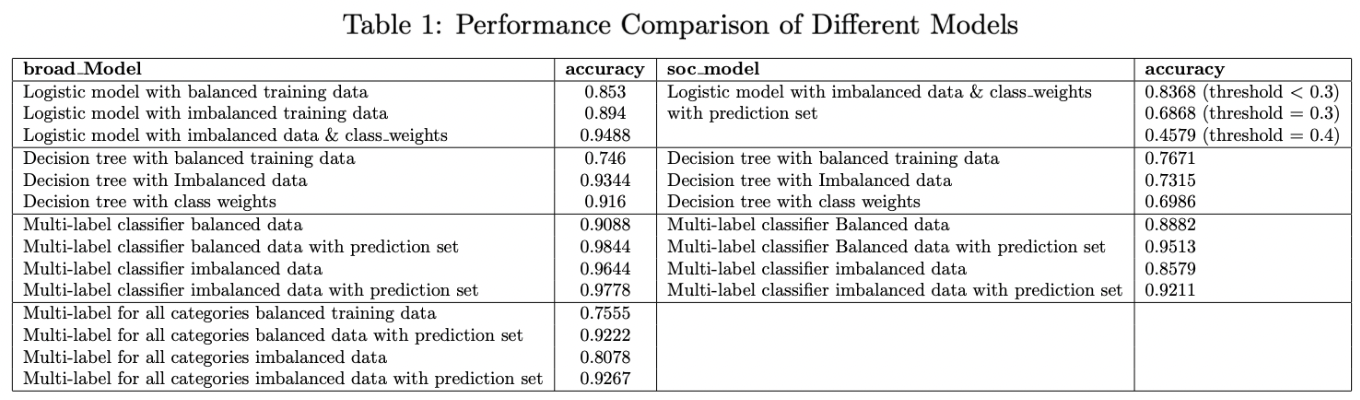

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## preparing data

In [ ]:
data = pd.read_csv('/content/datasets/train_data-15mar-1.csv')

In [ ]:
data.head()

,Unnamed: 0,Title,Category,broad_category
0,1448,udio s ai music is my new obsession,{AI in various Industries},{Society}
1,802,ai opens door to safe effective new antibiot...,{AI in various Industries},{Society}
2,776,the algorithm journey map a tangible approac...,{AI in various Industries},{Society}
3,1548,tears for fears defend using ai to create new ...,{AI in various Industries},{Society}
4,925,how ai can power brand management,{AI in various Industries},{Society}


In [ ]:
data['broad_category'].value_counts()

,count
broad_category,
{Society},3797
{Education},300
{Careers & Workforce},300
{Other},100


In [ ]:
data['Category'].value_counts()

,count
Category,
{AI in various Industries},1000
{AI Governance & Geopolitics},800
{AI in companies & Enterprises},800
{AI Investments & Market Trends},598
{Education},300
{Careers & Workforce},300
"{AI Ethics, Law & Policy}",300
"{AI overview, risks & impact}",299
{Other},100


### 1. preparing broad_category data

#### 1.1 preparing imbalanced data

In [ ]:
d1 = data[['Title','broad_category','Category']]
d1['broad_category'].value_counts() # will use class_weights parameters in classifiers to account for class imbalance

,count
broad_category,
{Society},3797
{Education},300
{Careers & Workforce},300
{Other},100


In [ ]:
# Preprocessing function
def preprocess(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply preprocessing to the 'Title' column
d1['Title'] = d1['Title'].apply(preprocess)

<ipython-input-9-f4375be31be6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Title'] = d1['Title'].apply(preprocess)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    d1["Title"], d1[["Category","broad_category"]], test_size=0.2, random_state=42, stratify=d1["broad_category"]
)

In [ ]:
y_train1.value_counts(), y_test1.value_counts()

(Category                          broad_category       
 {AI in various Industries}        {Society}                800
 {AI Governance & Geopolitics}     {Society}                663
 {AI in companies & Enterprises}   {Society}                632
 {AI Investments & Market Trends}  {Society}                467
 {AI overview, risks & impact}     {Society}                245
 {Education}                       {Education}              240
 {Careers & Workforce}             {Careers & Workforce}    240
 {AI Ethics, Law & Policy}         {Society}                230
 {Other}                           {Other}                   80
 Name: count, dtype: int64,
 Category                          broad_category       
 {AI in various Industries}        {Society}                200
 {AI in companies & Enterprises}   {Society}                168
 {AI Governance & Geopolitics}     {Society}                137
 {AI Investments & Market Trends}  {Society}                131
 {AI Ethics, Law & Policy}

In [ ]:
y_train11 = y_train1.copy()

In [ ]:
y_test11 = y_test1.copy()

In [ ]:
y_test1 = y_test1['broad_category']

In [ ]:
y_train1 = y_train1['broad_category']

In [ ]:
y_train11

,Category,broad_category
1307,{AI Governance & Geopolitics},{Society}
729,{AI in various Industries},{Society}
2300,{AI in companies & Enterprises},{Society}
3883,"{AI Ethics, Law & Policy}",{Society}
2815,{AI Investments & Market Trends},{Society}
...,...,...
1584,{AI Governance & Geopolitics},{Society}
1053,{AI Governance & Geopolitics},{Society}
980,{AI in various Industries},{Society}
2299,{AI in companies & Enterprises},{Society}


#### 1.2 preparing equally proportioned training data

In [ ]:
d11 = pd.concat([X_train1,y_train11],axis=1)

In [ ]:
d11

,Title,Category,broad_category
1307,china west agree global ai rules amid existent...,{AI Governance & Geopolitics},{Society}
729,putting bioethics work ai trust health care,{AI in various Industries},{Society}
2300,accelerating google org future impact ai,{AI in companies & Enterprises},{Society}
3883,rise machine defendant blame ai makes mistakes,"{AI Ethics, Law & Policy}",{Society}
2815,ai stocks goldman sachs recommends next wave a...,{AI Investments & Market Trends},{Society}
...,...,...,...
1584,unesco eastern africa sub regional forum ai ea...,{AI Governance & Geopolitics},{Society}
1053,scion canada richest family looks grow ai inve...,{AI Governance & Geopolitics},{Society}
980,future ai thoracic surgery non small cell lung...,{AI in various Industries},{Society}
2299,google working reasoning ai chasing openai eff...,{AI in companies & Enterprises},{Society}


In [ ]:
import pandas as pd
import random
from sklearn.utils import resample



# Identify main categories and subcategories
main_category = "{Society}"  # Modify based on actual category names
subcategories = d11[d11["broad_category"] == main_category]["Category"].unique()

# Count samples per category
category_counts = d11["broad_category"].value_counts()
sorted_counts = category_counts.sort_values().values
second_smallest_sample_size = sorted_counts[1]  # Second smallest sample size

balanced_df = pd.DataFrame()

# Data Augmentation function (Back-translation Example)
def augment_text(text):
    # Replace with an actual augmentation technique (e.g., synonym replacement, back-translation)
    return text  # Simple reversal (for demonstration)

# Balance dataset
for label in d11["broad_category"].unique():
    if label == main_category:
        # Handle "Society" by equal sampling from subcategories
        sub_df = d11[d11["broad_category"] == main_category]
        per_subcategory_sample_size = second_smallest_sample_size // len(subcategories)

        sub_balanced = pd.DataFrame()
        for subcat in subcategories:
            sub_samples = sub_df[sub_df["Category"] == subcat]
            if len(sub_samples) > per_subcategory_sample_size:
                sub_samples = sub_samples.sample(per_subcategory_sample_size, random_state=42)
            else:
                num_to_add = per_subcategory_sample_size - len(sub_samples)
                augmented_samples = sub_samples.sample(num_to_add, replace=True, random_state=42)
                augmented_samples["Title"] = augmented_samples["Title"].apply(augment_text)
                sub_samples = pd.concat([sub_samples, augmented_samples])

            sub_balanced = pd.concat([sub_balanced, sub_samples])

        balanced_df = pd.concat([balanced_df, sub_balanced])

    elif label=="{Other}":
        n = 120
        class_samples = d11[d11["broad_category"] == label]
        num_to_add = n - len(class_samples)
        augmented_samples = class_samples.sample(num_to_add, replace=True, random_state=42)
        augmented_samples["Title"] = augmented_samples["Title"].apply(augment_text)
        class_samples = pd.concat([class_samples, augmented_samples])
        balanced_df = pd.concat([balanced_df, class_samples])
    else:
        # Handle other categories normally
        class_samples = d11[d11["broad_category"] == label]

        if len(class_samples) > second_smallest_sample_size:
            # Downsample
            class_samples = class_samples.sample(second_smallest_sample_size, random_state=42)
        else:
            # Upsample with augmentation
            num_to_add = second_smallest_sample_size - len(class_samples)
            augmented_samples = class_samples.sample(num_to_add, replace=True, random_state=42)
            augmented_samples["Title"] = augmented_samples["Title"].apply(augment_text)
            class_samples = pd.concat([class_samples, augmented_samples])

        balanced_df = pd.concat([balanced_df, class_samples])

# Shuffle dataset
bdf1 = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save balanced dataset
bdf1.to_csv("balanced_data.csv", index=False)

print("Original Data Distribution:\n", category_counts)
print("Balanced Data Distribution:\n", bdf1["broad_category"].value_counts())


Original Data Distribution:
 broad_category
{Society}                3037
{Careers & Workforce}     240
{Education}               240
{Other}                    80
Name: count, dtype: int64
Balanced Data Distribution:
 broad_category
{Education}              240
{Society}                240
{Careers & Workforce}    240
{Other}                  120
Name: count, dtype: int64


In [ ]:
d11[d11['broad_category']=='{Other}']['Title']

,Title
4430,jason discusses innovation dare podcast
4443,jason discusses institution dare podcast
4412,trump ai policy overrated underrated cerebral ...
4455,technology security ts podcast professor johan...
4406,people using google study software make ai pod...
...,...
4461,podcast professor johanna weaver ai humanistic...
4447,jason christopher warner discusses ai ai innov...
4414,netizens torturing google ai podcast hosts
4417,daily heller google ai podcast capabilities ap...


In [ ]:
bdf1[bdf1['broad_category']=='{Other}']['Title'].value_counts()[:20]

,count
Title,
artificial intelligence podcasting lessons abc atomic number 16 episode title optimization pilot,4
people using software make ai podcasts weird amazing,4
use google science package ai colored podcasts experience weird amazing,3
people habituate google study software get ai podcasts weird maybe amazing,3
bbc world service,3
people using google science study software initially make screen ai colored podcasts guys feel weird big amazing,3
trump ai policy overrated underrated cerebral valley podcast,3
google reciprocal ohm lets information technology ai,3
jason discusses institution dare podcast,3


In [ ]:
bdf1['Category'].value_counts()

,count
Category,
{Education},240
{Careers & Workforce},240
{Other},120
{AI Governance & Geopolitics},40
{AI in companies & Enterprises},40
{AI in various Industries},40
"{AI overview, risks & impact}",40
{AI Investments & Market Trends},40
"{AI Ethics, Law & Policy}",40


In [ ]:
X_train11 = bdf1['Title'] # balanced training data

In [ ]:
y_train11 = bdf1['broad_category'] # balanced training data

### 2. preparing data for sub categories

#### 2.1 preparing imbalanced data

In [ ]:
d2 = data[data['broad_category']=='{Society}'][['Title','Category']]
d2['Category'].value_counts() # will use class_weights parameters in classifiers to account for class imbalance

,count
Category,
{AI in various Industries},1000
{AI Governance & Geopolitics},800
{AI in companies & Enterprises},800
{AI Investments & Market Trends},598
"{AI Ethics, Law & Policy}",300
"{AI overview, risks & impact}",299


In [ ]:
# Perform stratified train-test split for society subcategories
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    d2["Title"], d2["Category"], test_size=0.2, random_state=42, stratify=d2["Category"]
)

In [ ]:
# Perform stratified train-test split for society subcategories
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(
    d2["Title"], d2["Category"], test_size=0.2, random_state=42, stratify=d2["Category"]
)

#### 2.2 preparing balanced data

In [ ]:
import pandas as pd
import random
from sklearn.utils import resample



# Identify main categories and subcategories
# main_category = "{Society}"  # Modify based on actual category names
# subcategories = d11[d11["broad_category"] == main_category]["Category"].unique()

# Count samples per category
# category_counts = d11["broad_category"].value_counts()
category_counts = d2['Category'].value_counts()
sorted_counts = category_counts.sort_values().values
second_smallest_sample_size = sorted_counts[1]  # Second smallest sample size

balanced_df = pd.DataFrame()

# Data Augmentation function (Back-translation Example)
def augment_text(text):
    # Replace with an actual augmentation technique (e.g., synonym replacement, back-translation)
    return text  # Simple reversal (for demonstration)

# Balance dataset
for label in d2["Category"].unique():

    # Handle other categories normally
    class_samples = d2[d2["Category"] == label]

    if len(class_samples) > second_smallest_sample_size:
        # Downsample
        class_samples = class_samples.sample(second_smallest_sample_size, random_state=42)
    else:
        # Upsample with augmentation
        num_to_add = second_smallest_sample_size - len(class_samples)
        augmented_samples = class_samples.sample(num_to_add, replace=True, random_state=42)
        augmented_samples["Title"] = augmented_samples["Title"].apply(augment_text)
        class_samples = pd.concat([class_samples, augmented_samples])

    balanced_df = pd.concat([balanced_df, class_samples])

# Shuffle dataset
bdfs = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save balanced dataset
bdfs.to_csv("balanced_data_soc.csv", index=False)

print("Original Data Distribution:\n", category_counts)
print("Balanced Data Distribution:\n", bdfs["Category"].value_counts())


Original Data Distribution:
 Category
{AI in various Industries}          1000
{AI Governance & Geopolitics}        800
{AI in companies & Enterprises}      800
{AI Investments & Market Trends}     598
{AI Ethics, Law & Policy}            300
{AI overview, risks & impact}        299
Name: count, dtype: int64
Balanced Data Distribution:
 Category
{AI Ethics, Law & Policy}           300
{AI Investments & Market Trends}    300
{AI in companies & Enterprises}     300
{AI in various Industries}          300
{AI overview, risks & impact}       300
{AI Governance & Geopolitics}       300
Name: count, dtype: int64


In [ ]:
X_train_s11 = bdfs['Title'] # balanced training data
y_train_s11 = bdfs['Category']

### 2.1 balanced data

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split

In [ ]:
bdf1['Category'].unique()

array(['{Education}', '{Other}', '{AI Governance & Geopolitics}',
       '{AI in companies & Enterprises}', '{Careers & Workforce}',
       '{AI in various Industries}', '{AI overview, risks & impact}',
       '{AI Investments & Market Trends}', '{AI Ethics, Law & Policy}'],
      dtype=object)

In [ ]:
society = ['{AI in various Industries}', '{AI in companies & Enterprises}',
       '{AI Investments & Market Trends}', '{AI Ethics, Law & Policy}',
       '{AI Governance & Geopolitics}', '{AI overview, risks & impact}']
def c(x):
  if x in society:
    return '{Society}'
  else:
    return x

In [ ]:
bdf1['broad_category'] = bdf1['Category'].apply(lambda x: c(x))

In [ ]:
bdf1.head()

,Title,Category,broad_category
0,ai reshaping early early childhood development,{Education},{Education}
1,use google science package ai colored podcasts...,{Other},{Other}
2,u must win ai race,{AI Governance & Geopolitics},{Society}
3,faculty member attends workshop ai,{Education},{Education}
4,google cloud summit unifying data data residen...,{AI in companies & Enterprises},{Society}


In [ ]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(text, truncation=True, padding="max_length",
                                  max_length=self.max_length, return_tensors="pt")

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.float)
        }

In [ ]:
# model 2
class MultiLabelClassifier(nn.Module):
    def __init__(self, num_labels):
        super(MultiLabelClassifier, self).__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.batch_norm = nn.BatchNorm1d(self.bert.config.hidden_size)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        x = self.dropout(pooled_output)
        x = self.batch_norm(x)
        logits = self.classifier(x)
        return torch.sigmoid(logits)

In [ ]:
# One-hot encode the broad_category column
broad_categories = ['{Education}', '{Careers & Workforce}', '{Society}', '{Other}']
for cat in broad_categories:
    bdf1[cat] = bdf1['broad_category'].apply(lambda x: 1 if cat in x else 0)

In [ ]:
bdf1.head()

,Title,Category,broad_category,{Education},{Careers & Workforce},{Society},{Other}
0,ai reshaping early early childhood development,{Education},{Education},1,0,0,0
1,use google science package ai colored podcasts...,{Other},{Other},0,0,0,1
2,u must win ai race,{AI Governance & Geopolitics},{Society},0,0,1,0
3,faculty member attends workshop ai,{Education},{Education},1,0,0,0
4,google cloud summit unifying data data residen...,{AI in companies & Enterprises},{Society},0,0,1,0


In [ ]:
# Define broad categories
#broad_categories = ['{Education}', '{Careers & Workforce}', '{Society}', '{Other}']
num_broad_labels = len(broad_categories)

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Convert category labels to binary format
bdf1[broad_categories] = bdf1[broad_categories].astype(int)

In [ ]:
bdf1.head()

,Title,Category,broad_category,{Education},{Careers & Workforce},{Society},{Other}
0,ai reshaping early early childhood development,{Education},{Education},1,0,0,0
1,use google science package ai colored podcasts...,{Other},{Other},0,0,0,1
2,u must win ai race,{AI Governance & Geopolitics},{Society},0,0,1,0
3,faculty member attends workshop ai,{Education},{Education},1,0,0,0
4,google cloud summit unifying data data residen...,{AI in companies & Enterprises},{Society},0,0,1,0


## 1. logistic regression

### 1. broad_classifier

In [ ]:
# training on balanced data


log_broad_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

log_broad_pipeline.fit(X_train11, y_train11)
print("First Classifier Trained!")


# # Train Second Classifier (Society subcategories) with class_weight='balanced'
# sub_pipeline = Pipeline([
#     ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
#     ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'))
# ])

# sub_pipeline.fit(X_train_s, y_train_s)
# print("Second Classifier Trained!")

# Evaluate the First Classifier
y_pred = log_broad_pipeline.predict(X_test1)
accuracy_broad = accuracy_score(y_test1, y_pred)
print("\nFirst Classifier Accuracy:", accuracy_broad)
print("\nFirst Classifier Report:\n", classification_report(y_test1, y_pred))

# # Evaluate the Second Classifier (if there is test data for subcategories)
# if len(y_test_s) > 0:  # Avoid issue if no test data is available
#     y_pred_s = sub_pipeline.predict(X_test_s)
#     accuracy_sub = accuracy_score(y_test_s, y_pred_s)
#     print("\nSecond Classifier Accuracy:", accuracy_sub)
#     print("\nSecond Classifier Report:\n", classification_report(y_test_s, y_pred_s))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


First Classifier Trained!

First Classifier Accuracy: 0.8533333333333334

First Classifier Report:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.53      0.92      0.67        60
          {Education}       0.43      0.88      0.58        60
              {Other}       0.78      0.90      0.84        20
            {Society}       0.98      0.84      0.91       760

             accuracy                           0.85       900
            macro avg       0.68      0.89      0.75       900
         weighted avg       0.91      0.85      0.87       900



In [ ]:
# training on whole training data without class weights
log_broad_pipeline1 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

log_broad_pipeline1.fit(X_train1, y_train1)
print("First Classifier Trained!")


# # Train Second Classifier (Society subcategories) with class_weight='balanced'
# sub_pipeline = Pipeline([
#     ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
#     ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'))
# ])

# sub_pipeline.fit(X_train_s, y_train_s)
# print("Second Classifier Trained!")

# Evaluate the First Classifier
y_pred = log_broad_pipeline1.predict(X_test1)
accuracy_broad = accuracy_score(y_test1, y_pred)
print("\nFirst Classifier Accuracy:", accuracy_broad)
print("\nFirst Classifier Report:\n", classification_report(y_test1, y_pred))

# # Evaluate the Second Classifier (if there is test data for subcategories)
# if len(y_test_s) > 0:  # Avoid issue if no test data is available
#     y_pred_s = sub_pipeline.predict(X_test_s)
#     accuracy_sub = accuracy_score(y_test_s, y_pred_s)
#     print("\nSecond Classifier Accuracy:", accuracy_sub)
#     print("\nSecond Classifier Report:\n", classification_report(y_test_s, y_pred_s))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


First Classifier Trained!

First Classifier Accuracy: 0.8944444444444445

First Classifier Report:
                        precision    recall  f1-score   support

{Careers & Workforce}       1.00      0.33      0.50        60
          {Education}       0.93      0.23      0.37        60
              {Other}       1.00      0.60      0.75        20
            {Society}       0.89      1.00      0.94       760

             accuracy                           0.89       900
            macro avg       0.96      0.54      0.64       900
         weighted avg       0.90      0.89      0.87       900



In [ ]:
# training on whole training data without class weights
log_broad_pipeline2 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000,class_weight="balanced"))
])

log_broad_pipeline2.fit(X_train1, y_train1)
print("First Classifier Trained!")


# # Train Second Classifier (Society subcategories) with class_weight='balanced'
# sub_pipeline = Pipeline([
#     ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
#     ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'))
# ])

# sub_pipeline.fit(X_train_s, y_train_s)
# print("Second Classifier Trained!")

# Evaluate the First Classifier
y_pred = log_broad_pipeline2.predict(X_test1)
accuracy_broad = accuracy_score(y_test1, y_pred)
print("\nFirst Classifier Accuracy:", accuracy_broad)
print("\nFirst Classifier Report:\n", classification_report(y_test1, y_pred))

# # Evaluate the Second Classifier (if there is test data for subcategories)
# if len(y_test_s) > 0:  # Avoid issue if no test data is available
#     y_pred_s = sub_pipeline.predict(X_test_s)
#     accuracy_sub = accuracy_score(y_test_s, y_pred_s)
#     print("\nSecond Classifier Accuracy:", accuracy_sub)
#     print("\nSecond Classifier Report:\n", classification_report(y_test_s, y_pred_s))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


First Classifier Trained!

First Classifier Accuracy: 0.9488888888888889

First Classifier Report:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.84      0.78      0.81        60
          {Education}       0.80      0.82      0.81        60
              {Other}       0.95      0.90      0.92        20
            {Society}       0.97      0.97      0.97       760

             accuracy                           0.95       900
            macro avg       0.89      0.87      0.88       900
         weighted avg       0.95      0.95      0.95       900



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

#def evaluate_with_prediction_set(model, X_test, y_test, label_mapping, top_k=3, threshold=None):
def evaluate_with_prediction_set(model, X_test, y_test, label_mapping, top_k=3, threshold=None, return_preds=False):

    """
    Evaluate the model with a prediction set, based on top-k predictions or a threshold.

    Parameters:
    - model: Trained model (pipeline with classifier)
    - X_test: Test data (features)
    - y_test: True labels (as a pandas Series or list)
    - label_mapping: Dictionary mapping class indices to category names
    - top_k: Number of top predictions to consider for each sample
    - threshold: Probability threshold (optional, used instead of top_k)

    Returns:
    - accuracy: Accuracy of the model considering top-k or threshold-based predictions
    - classification report: Detailed precision, recall, f1-score for the predictions
    """

    # Convert y_test to list if it's a pandas Series to avoid index errors
    if isinstance(y_test, pd.Series):
        y_test = y_test.tolist()

    # Get predicted probabilities from the model
    pred_probs = model.predict_proba(X_test)

    # Get top-1 prediction as a fallback
    y_pred_1 = np.argmax(pred_probs, axis=1)
    y_pred1 = [label_mapping.get(i, "Unknown") for i in y_pred_1]  # Use .get() to avoid KeyError

    # Step 2: Create prediction sets for each sample
    prediction_sets = []

    for probs in pred_probs:
        if threshold is not None:
            # Select classes above the threshold
            top_indices = np.where(probs > threshold)[0]
        else:
            # Select top-k predictions based on probabilities
            top_indices = np.argsort(probs)[::-1][:top_k]
        prediction_sets.append(set(top_indices))  # Use set for efficient lookup

    # Step 3: Check if the true label is in the prediction set
    correct_predictions = 0
    y_pred = []

    for i, label in enumerate(y_test):
        label_idx = list(label_mapping.keys())[list(label_mapping.values()).index(label)]  # Convert label to index
        if label_idx in prediction_sets[i]:  # Check if true label is in the predicted set
            correct_predictions += 1
            y_pred.append(label)  # Append the actual correct label
        else:
            y_pred.append(y_pred1[i])  # Use top-1 prediction as fallback

    # Step 4: Calculate accuracy
    accuracy = correct_predictions / len(y_test)

    # Step 5: Classification report
    class_report = classification_report(y_test, y_pred, zero_division=0)
    if return_preds:
        return accuracy, class_report, y_pred, prediction_sets, pred_probs

    return accuracy, class_report, prediction_sets, pred_probs


# Example usage with broad_pipeline:
import pandas as pd  # Ensure pandas is imported

label_mapping = {
    0: '{Careers & Workforce}',
    1: '{Education}',
    2: '{Other}',
    3: '{Society}'
}



In [ ]:
thresh = 0.4 # trained on balanced data
accuracy_broad, class_report_broad, pred_set, pred_probs = evaluate_with_prediction_set(
    log_broad_pipeline, X_test1, y_test1, label_mapping, threshold=thresh
)

print(f"Accuracy threshold:{thresh} for First Classifier: {accuracy_broad:.4f}")
print("\nClassification Report for First Classifier:\n", class_report_broad)

Accuracy threshold:0.4 for First Classifier: 0.6167

Classification Report for First Classifier:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.53      0.92      0.67        60
          {Education}       0.44      0.90      0.59        60
              {Other}       0.78      0.90      0.84        20
            {Society}       0.99      0.84      0.91       760

             accuracy                           0.85       900
            macro avg       0.69      0.89      0.75       900
         weighted avg       0.92      0.85      0.87       900



In [ ]:
thresh = 0.4  # trained on whole training data without class weights
accuracy_broad, class_report_broad, pred_set, pred_probs = evaluate_with_prediction_set(
    log_broad_pipeline1, X_test1, y_test1, label_mapping, threshold=thresh
)

print(f"Accuracy threshold:{thresh} for First Classifier: {accuracy_broad:.4f}")
print("\nClassification Report for First Classifier:\n", class_report_broad)

Accuracy threshold:0.4 for First Classifier: 0.9011

Classification Report for First Classifier:
                        precision    recall  f1-score   support

{Careers & Workforce}       1.00      0.40      0.57        60
          {Education}       0.94      0.27      0.42        60
              {Other}       1.00      0.60      0.75        20
            {Society}       0.90      1.00      0.94       760

             accuracy                           0.90       900
            macro avg       0.96      0.57      0.67       900
         weighted avg       0.91      0.90      0.88       900



In [ ]:
thresh = 0.4  # trained on whole training data with class weights
accuracy_broad, class_report_broad, pred_set, pred_probs = evaluate_with_prediction_set(
    log_broad_pipeline2, X_test1, y_test1, label_mapping, threshold=thresh
)

print(f"Accuracy threshold:{thresh} for First Classifier: {accuracy_broad:.4f}")
print("\nClassification Report for First Classifier:\n", class_report_broad)

Accuracy threshold:0.4 for First Classifier: 0.9522

Classification Report for First Classifier:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.84      0.80      0.82        60
          {Education}       0.85      0.85      0.85        60
              {Other}       0.95      0.90      0.92        20
            {Society}       0.97      0.98      0.98       760

             accuracy                           0.96       900
            macro avg       0.90      0.88      0.89       900
         weighted avg       0.96      0.96      0.96       900



### 2. sub cat classifier

In [ ]:
# training on imbalanced data
sub_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

sub_pipeline.fit(X_train_s1, y_train_s1)
print("Second Classifier Trained!")


# Evaluate the Second Classifier (if there is test data for subcategories)
if len(y_test_s1) > 0:  # Avoid issue if no test data is available
    y_pred_s = sub_pipeline.predict(X_test_s1)
    accuracy_sub = accuracy_score(y_test_s1, y_pred_s)
    print("\nSecond Classifier Accuracy:", accuracy_sub)
    print("\nSecond Classifier Report:\n", classification_report(y_test_s1, y_pred_s))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Second Classifier Trained!

Second Classifier Accuracy: 0.7802631578947369

Second Classifier Report:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.96      0.37      0.53        60
   {AI Governance & Geopolitics}       0.77      0.85      0.81       160
{AI Investments & Market Trends}       0.94      0.83      0.88       120
 {AI in companies & Enterprises}       0.80      0.87      0.83       160
      {AI in various Industries}       0.67      0.84      0.75       200
   {AI overview, risks & impact}       1.00      0.45      0.62        60

                        accuracy                           0.78       760
                       macro avg       0.86      0.70      0.74       760
                    weighted avg       0.81      0.78      0.77       760



In [ ]:
# training on imbalanced data with class weights
sub_pipeline1 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'))
])

sub_pipeline1.fit(X_train_s1, y_train_s1)
print("Second Classifier Trained!")


# Evaluate the Second Classifier (if there is test data for subcategories)
if len(y_test_s1) > 0:  # Avoid issue if no test data is available
    y_pred_s = sub_pipeline1.predict(X_test_s1)
    accuracy_sub = accuracy_score(y_test_s1, y_pred_s)
    print("\nSecond Classifier Accuracy:", accuracy_sub)
    print("\nSecond Classifier Report:\n", classification_report(y_test_s1, y_pred_s))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Second Classifier Trained!

Second Classifier Accuracy: 0.8184210526315789

Second Classifier Report:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.80      0.78      0.79        60
   {AI Governance & Geopolitics}       0.82      0.82      0.82       160
{AI Investments & Market Trends}       0.91      0.88      0.89       120
 {AI in companies & Enterprises}       0.83      0.84      0.84       160
      {AI in various Industries}       0.81      0.77      0.79       200
   {AI overview, risks & impact}       0.69      0.82      0.75        60

                        accuracy                           0.82       760
                       macro avg       0.81      0.82      0.81       760
                    weighted avg       0.82      0.82      0.82       760



In [ ]:
# training in balanced data
sub_pipeline2 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

sub_pipeline2.fit(X_train_s11, y_train_s11)
print("Second Classifier Trained!")


# Evaluate the Second Classifier (if there is test data for subcategories)
if len(y_test_s1) > 0:  # Avoid issue if no test data is available
    y_pred_s = sub_pipeline2.predict(X_test_s1)
    accuracy_sub = accuracy_score(y_test_s1, y_pred_s)
    print("\nSecond Classifier Accuracy:", accuracy_sub)
    print("\nSecond Classifier Report:\n", classification_report(y_test_s1, y_pred_s))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Second Classifier Trained!

Second Classifier Accuracy: 0.8368421052631579

Second Classifier Report:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.72      0.97      0.82        60
   {AI Governance & Geopolitics}       0.84      0.76      0.80       160
{AI Investments & Market Trends}       0.91      0.95      0.93       120
 {AI in companies & Enterprises}       0.85      0.84      0.85       160
      {AI in various Industries}       0.90      0.73      0.81       200
   {AI overview, risks & impact}       0.71      1.00      0.83        60

                        accuracy                           0.84       760
                       macro avg       0.82      0.88      0.84       760
                    weighted avg       0.85      0.84      0.84       760



In [ ]:
sub_label_mapping={
    0:'{AI Ethics, Law & Policy}',
    1:'{AI Governance & Geopolitics}',
    2:'{AI Investments & Market Trends}',
    3:'{AI in companies & Enterprises}',
    4:'{AI in various Industries}',
    5:'{AI overview, risks & impact}'
}

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

#def evaluate_with_prediction_set(model, X_test, y_test, label_mapping, top_k=3, threshold=None):
def evaluate_with_prediction_set(model, X_test, y_test, label_mapping, top_k=3, threshold=None, return_preds=False):

    """
    Evaluate the model with a prediction set, based on top-k predictions or a threshold.

    Parameters:
    - model: Trained model (pipeline with classifier)
    - X_test: Test data (features)
    - y_test: True labels (as a pandas Series or list)
    - label_mapping: Dictionary mapping class indices to category names
    - top_k: Number of top predictions to consider for each sample
    - threshold: Probability threshold (optional, used instead of top_k)

    Returns:
    - accuracy: Accuracy of the model considering top-k or threshold-based predictions
    - classification report: Detailed precision, recall, f1-score for the predictions
    """

    # Convert y_test to list if it's a pandas Series to avoid index errors
    if isinstance(y_test, pd.Series):
        y_test = y_test.tolist()

    # Get predicted probabilities from the model
    pred_probs = model.predict_proba(X_test)

    # Get top-1 prediction as a fallback
    y_pred_1 = np.argmax(pred_probs, axis=1)
    y_pred1 = [label_mapping.get(i, "Unknown") for i in y_pred_1]  # Use .get() to avoid KeyError

    # Step 2: Create prediction sets for each sample
    prediction_sets = []

    for probs in pred_probs:
        if threshold is not None:
            # Select classes above the threshold
            top_indices = np.where(probs > threshold)[0]
            # if len(top_indices) == 0:  # Ensure at least one prediction
                # top_indices = [np.argmax(probs)]
        else:
            # Select top-k predictions based on probabilities
            top_indices = np.argsort(probs)[::-1][:top_k]
        prediction_sets.append(set(top_indices))  # Use set for efficient lookup

    # Step 3: Check if the true label is in the prediction set
    correct_predictions = 0
    y_pred = []

    for i, label in enumerate(y_test):
        label_idx = list(label_mapping.keys())[list(label_mapping.values()).index(label)]  # Convert label to index
        if label_idx in prediction_sets[i]:  # Check if true label is in the predicted set
            correct_predictions += 1
            y_pred.append(label)  # Append the actual correct label
        else:
            y_pred.append(y_pred1[i])  # Use top-1 prediction as fallback

    # Step 4: Calculate accuracy
    accuracy = correct_predictions / len(y_test)

    # Step 5: Classification report
    class_report = classification_report(y_test, y_pred, zero_division=0)
    if return_preds:
        return accuracy, class_report, y_pred, prediction_sets, pred_probs

    return accuracy, class_report, prediction_sets, pred_probs


# Example usage with broad_pipeline:
import pandas as pd  # Ensure pandas is imported




In [ ]:
text  = ["Ethical problems of AI in music"]
pred_probs = sub_pipeline.predict_proba(text)
pred_probs

array([[0.17094391, 0.11423539, 0.03552937, 0.05452175, 0.59171647,
        0.0330531 ]])

In [ ]:
# trained in imbalanced data
threshold=0.3
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    sub_pipeline, X_test_s1, y_test_s1, sub_label_mapping, threshold=threshold, return_preds=True
)

print(f"Accuracy (threshold) {threshold} for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) 0.3 for second Classifier: 0.7237

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.96      0.37      0.53        60
   {AI Governance & Geopolitics}       0.78      0.86      0.82       160
{AI Investments & Market Trends}       0.94      0.84      0.89       120
 {AI in companies & Enterprises}       0.82      0.89      0.85       160
      {AI in various Industries}       0.69      0.88      0.77       200
   {AI overview, risks & impact}       1.00      0.45      0.62        60

                        accuracy                           0.79       760
                       macro avg       0.86      0.71      0.75       760
                    weighted avg       0.82      0.79      0.79       760



In [ ]:
# trained with class weights
threshold=0.3
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    sub_pipeline1, X_test_s1, y_test_s1, sub_label_mapping, threshold=threshold, return_preds=True
)

print(f"Accuracy (threshold) for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) for second Classifier: 0.6816

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.82      0.78      0.80        60
   {AI Governance & Geopolitics}       0.82      0.83      0.83       160
{AI Investments & Market Trends}       0.91      0.88      0.89       120
 {AI in companies & Enterprises}       0.84      0.86      0.85       160
      {AI in various Industries}       0.81      0.78      0.79       200
   {AI overview, risks & impact}       0.70      0.82      0.75        60

                        accuracy                           0.82       760
                       macro avg       0.82      0.82      0.82       760
                    weighted avg       0.83      0.82      0.83       760



In [ ]:
# trained on balanced data
threshold=0.3
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    sub_pipeline2, X_test_s1, y_test_s1, sub_label_mapping, threshold=threshold, return_preds=True
)

print(f"Accuracy (threshold) for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) for second Classifier: 0.6868

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.72      0.97      0.82        60
   {AI Governance & Geopolitics}       0.84      0.76      0.80       160
{AI Investments & Market Trends}       0.91      0.95      0.93       120
 {AI in companies & Enterprises}       0.85      0.84      0.85       160
      {AI in various Industries}       0.90      0.73      0.81       200
   {AI overview, risks & impact}       0.71      1.00      0.83        60

                        accuracy                           0.84       760
                       macro avg       0.82      0.88      0.84       760
                    weighted avg       0.85      0.84      0.84       760



In [ ]:
# Get results with threshold=0.4
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    sub_pipeline, X_test_s1, y_test_s1, sub_label_mapping, threshold=0.4, return_preds=True
)

print(f"Accuracy (threshold) for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) for second Classifier: 0.5395

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.96      0.37      0.53        60
   {AI Governance & Geopolitics}       0.77      0.85      0.81       160
{AI Investments & Market Trends}       0.94      0.83      0.88       120
 {AI in companies & Enterprises}       0.80      0.87      0.83       160
      {AI in various Industries}       0.67      0.84      0.75       200
   {AI overview, risks & impact}       1.00      0.45      0.62        60

                        accuracy                           0.78       760
                       macro avg       0.86      0.70      0.74       760
                    weighted avg       0.81      0.78      0.77       760



In [ ]:
# Get results with threshold=0.4
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    sub_pipeline1, X_test_s1, y_test_s1, sub_label_mapping, threshold=0.4, return_preds=True
)

print(f"Accuracy (threshold) for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) for second Classifier: 0.4579

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.80      0.78      0.79        60
   {AI Governance & Geopolitics}       0.82      0.82      0.82       160
{AI Investments & Market Trends}       0.91      0.88      0.89       120
 {AI in companies & Enterprises}       0.83      0.84      0.84       160
      {AI in various Industries}       0.81      0.77      0.79       200
   {AI overview, risks & impact}       0.69      0.82      0.75        60

                        accuracy                           0.82       760
                       macro avg       0.81      0.82      0.81       760
                    weighted avg       0.82      0.82      0.82       760



In [ ]:
# Get results with threshold=0.4
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    sub_pipeline2, X_test_s1, y_test_s1, sub_label_mapping, threshold=0.4, return_preds=True
)

print(f"Accuracy (threshold) for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) for second Classifier: 0.4132

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.72      0.97      0.82        60
   {AI Governance & Geopolitics}       0.84      0.76      0.80       160
{AI Investments & Market Trends}       0.91      0.95      0.93       120
 {AI in companies & Enterprises}       0.85      0.84      0.85       160
      {AI in various Industries}       0.90      0.73      0.81       200
   {AI overview, risks & impact}       0.71      1.00      0.83        60

                        accuracy                           0.84       760
                       macro avg       0.82      0.88      0.84       760
                    weighted avg       0.85      0.84      0.84       760



## 2. Decision tree

### broad_pipeline

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.special import softmax
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
# Train with imbalanced data
dt_broad_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier(random_state=42))
])

dt_broad_pipeline.fit(X_train1, y_train1)

print("First Classifier (Decision Tree) Trained!")


# Evaluate the First Classifier
y_pred = dt_broad_pipeline.predict(X_test1)
accuracy_broad = accuracy_score(y_test1, y_pred)
print("\nFirst Classifier Accuracy:", accuracy_broad)
print("\nFirst Classifier Report:\n", classification_report(y_test1, y_pred))

First Classifier (Decision Tree) Trained!

First Classifier Accuracy: 0.9344444444444444

First Classifier Report:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.78      0.77      0.77        60
          {Education}       0.79      0.75      0.77        60
              {Other}       0.94      0.75      0.83        20
            {Society}       0.96      0.97      0.96       760

             accuracy                           0.93       900
            macro avg       0.87      0.81      0.83       900
         weighted avg       0.93      0.93      0.93       900



In [ ]:
# Train with balanced data
dt_broad_pipeline1 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier(random_state=42))
])

dt_broad_pipeline1.fit(X_train11, y_train11)

print("First Classifier (Decision Tree) Trained!")


# Evaluate the First Classifier
y_pred = dt_broad_pipeline1.predict(X_test1)
accuracy_broad = accuracy_score(y_test1, y_pred)
print("\nFirst Classifier Accuracy:", accuracy_broad)
print("\nFirst Classifier Report:\n", classification_report(y_test1, y_pred))

First Classifier (Decision Tree) Trained!

First Classifier Accuracy: 0.7466666666666667

First Classifier Report:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.23      0.80      0.36        60
          {Education}       0.55      0.73      0.63        60
              {Other}       0.62      0.80      0.70        20
            {Society}       0.96      0.74      0.84       760

             accuracy                           0.75       900
            macro avg       0.59      0.77      0.63       900
         weighted avg       0.88      0.75      0.79       900



In [ ]:
# Train with imbalanced data with class weights
dt_broad_pipeline2 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier(class_weight="balanced",random_state=42))
])

dt_broad_pipeline2.fit(X_train1, y_train1)

print("First Classifier (Decision Tree) Trained!")


# Evaluate the First Classifier
y_pred = dt_broad_pipeline2.predict(X_test1)
accuracy_broad = accuracy_score(y_test1, y_pred)
print("\nFirst Classifier Accuracy:", accuracy_broad)
print("\nFirst Classifier Report:\n", classification_report(y_test1, y_pred))

First Classifier (Decision Tree) Trained!

First Classifier Accuracy: 0.9166666666666666

First Classifier Report:
                        precision    recall  f1-score   support

{Careers & Workforce}       0.62      0.80      0.70        60
          {Education}       0.77      0.68      0.73        60
              {Other}       0.88      0.75      0.81        20
            {Society}       0.96      0.95      0.95       760

             accuracy                           0.92       900
            macro avg       0.81      0.80      0.80       900
         weighted avg       0.92      0.92      0.92       900



### soc_pipeline

In [ ]:
# Train on imbalance data
dt_sub_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier(random_state=42))
])

dt_sub_pipeline.fit(X_train_s1, y_train_s1)

print("Second Classifier (Decision Tree) Trained!")
tree_height = dt_sub_pipeline.named_steps["clf"].get_depth()
print("Decision Tree Height:", tree_height)
# Evaluate the Second Classifier (if there is test data for subcategories)
if len(y_test_s1) > 0:  # Avoid issue if no test data is available
    y_pred_s = dt_sub_pipeline.predict(X_test_s1)
    accuracy_sub = accuracy_score(y_test_s1, y_pred_s)
    print("\nSecond Classifier Accuracy:", accuracy_sub)
    print("\nSecond Classifier Report:\n", classification_report(y_test_s1, y_pred_s))

Second Classifier (Decision Tree) Trained!
Decision Tree Height: 249

Second Classifier Accuracy: 0.7315789473684211

Second Classifier Report:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.75      0.63      0.68        60
   {AI Governance & Geopolitics}       0.68      0.77      0.72       160
{AI Investments & Market Trends}       0.86      0.80      0.83       120
 {AI in companies & Enterprises}       0.79      0.79      0.79       160
      {AI in various Industries}       0.69      0.65      0.67       200
   {AI overview, risks & impact}       0.64      0.70      0.67        60

                        accuracy                           0.73       760
                       macro avg       0.73      0.72      0.73       760
                    weighted avg       0.73      0.73      0.73       760



In [ ]:
# Train on imbalance data
dt_sub_pipeline1 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

dt_sub_pipeline1.fit(X_train_s1, y_train_s1)

print("Second Classifier (Decision Tree) Trained!")
tree_height = dt_sub_pipeline1.named_steps["clf"].get_depth()
print("Decision Tree Height:", tree_height)

# Evaluate the Second Classifier (if there is test data for subcategories)
if len(y_test_s1) > 0:  # Avoid issue if no test data is available
    y_pred_s = dt_sub_pipeline1.predict(X_test_s1)
    accuracy_sub = accuracy_score(y_test_s1, y_pred_s)
    print("\nSecond Classifier Accuracy:", accuracy_sub)
    print("\nSecond Classifier Report:\n", classification_report(y_test_s1, y_pred_s))

Second Classifier (Decision Tree) Trained!
Decision Tree Height: 239

Second Classifier Accuracy: 0.6986842105263158

Second Classifier Report:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.76      0.73      0.75        60
   {AI Governance & Geopolitics}       0.68      0.72      0.70       160
{AI Investments & Market Trends}       0.86      0.84      0.85       120
 {AI in companies & Enterprises}       0.74      0.78      0.76       160
      {AI in various Industries}       0.63      0.52      0.57       200
   {AI overview, risks & impact}       0.51      0.70      0.59        60

                        accuracy                           0.70       760
                       macro avg       0.70      0.72      0.70       760
                    weighted avg       0.70      0.70      0.70       760



In [ ]:
# Train on balanced data
dt_sub_pipeline2 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier( random_state=42))
])

dt_sub_pipeline2.fit(X_train_s11, y_train_s11)

print("Second Classifier (Decision Tree) Trained!")
tree_height = dt_sub_pipeline2.named_steps["clf"].get_depth()
print("Decision Tree Height:", tree_height)

# Evaluate the Second Classifier (if there is test data for subcategories)
if len(y_test_s1) > 0:  # Avoid issue if no test data is available
    y_pred_s = dt_sub_pipeline2.predict(X_test_s1)
    accuracy_sub = accuracy_score(y_test_s1, y_pred_s)
    print("\nSecond Classifier Accuracy:", accuracy_sub)
    print("\nSecond Classifier Report:\n", classification_report(y_test_s1, y_pred_s))

Second Classifier (Decision Tree) Trained!
Decision Tree Height: 153

Second Classifier Accuracy: 0.7671052631578947

Second Classifier Report:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.73      1.00      0.85        60
   {AI Governance & Geopolitics}       0.74      0.70      0.72       160
{AI Investments & Market Trends}       0.90      0.87      0.89       120
 {AI in companies & Enterprises}       0.78      0.82      0.80       160
      {AI in various Industries}       0.81      0.57      0.67       200
   {AI overview, risks & impact}       0.59      1.00      0.75        60

                        accuracy                           0.77       760
                       macro avg       0.76      0.83      0.78       760
                    weighted avg       0.78      0.77      0.76       760



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Train Decision Tree with Depth Limit

text = ["​​how ai ml transforms raw numbers into actionable insights   enhancing decision making and fostering growth"]
# Get Probability Predictions
probs = dt_sub_pipeline21.predict_proba(text)

print(probs[:10])  # Print first 10 probability outputs


[[0.08477842 0.24759152 0.09922929 0.11464355 0.27456647 0.17919075]]


In [ ]:
# Train on imbalance data here tried finetuning the decision tree with max_depth paramter but no improved performance observed
dt_sub_pipeline21 = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
    ("clf", DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42))
])

dt_sub_pipeline21.fit(X_train_s11, y_train_s11)
# Get results with threshold=0.4
accuracy_broad_1, class_report_broad_1, y_pred_thresh,pred_set1,pred_probs = evaluate_with_prediction_set(
    dt_sub_pipeline21, X_test_s1, y_test_s1, sub_label_mapping, threshold=0.4, return_preds=True
)

print(f"Accuracy (threshold) for second Classifier: {accuracy_broad_1:.4f}")
print("\nClassification Report for second Classifier:\n", class_report_broad_1)

Accuracy (threshold) for second Classifier: 0.3329

Classification Report for second Classifier:
                                   precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.87      0.68      0.77        60
   {AI Governance & Geopolitics}       0.83      0.12      0.22       160
{AI Investments & Market Trends}       0.95      0.62      0.75       120
 {AI in companies & Enterprises}       0.89      0.57      0.69       160
      {AI in various Industries}       0.39      0.94      0.55       200
   {AI overview, risks & impact}       0.93      0.42      0.57        60

                        accuracy                           0.58       760
                       macro avg       0.81      0.56      0.59       760
                    weighted avg       0.76      0.58      0.56       760



## 4.Multi-Label classification

### preparing data

Here we prepared balanced/imbalanced datasets for both broad and society sub category classifier the all the models(2 broad models, 2 soc models) will be tested on the same dataset(broad_test, soc_test)

1. broad model:
    1. balanced - X_train11, y_train11
    2. imbalanced - X_train1, y_train1
    3. test - X_test1, y_test1
2. soc model:
    1. balanced - X_train_s11, y_train_s11
    2. imbalanced - X_train_s1, y_train_s1
    3. test - X_test_s1, y_test_s1

In [ ]:
k = df.copy()

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split

In [ ]:
society = ['{AI in various Industries}', '{AI in companies & Enterprises}',
       '{AI Investments & Market Trends}', '{AI Ethics, Law & Policy}',
       '{AI Governance & Geopolitics}', '{AI overview, risks & impact}']
def c(x):
  if x in society:
    return '{Society}'
  else:
    return x

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(text, truncation=True, padding="max_length",
                                  max_length=self.max_length, return_tensors="pt")

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.float)
        }

In [ ]:
# model 2
class MultiLabelClassifier(nn.Module):
    def __init__(self, num_labels):
        super(MultiLabelClassifier, self).__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.batch_norm = nn.BatchNorm1d(self.bert.config.hidden_size)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        x = self.dropout(pooled_output)
        x = self.batch_norm(x)
        logits = self.classifier(x)
        return torch.sigmoid(logits)

In [ ]:
# One-hot encode the broad_category column
broad_categories = ['{Education}', '{Careers & Workforce}', '{Society}', '{Other}']
# for cat in broad_categories:
#     df[cat] = df['broad_category'].apply(lambda x: 1 if cat in x else 0)

In [ ]:
df_train1 = pd.concat([X_train1,y_train1],axis=1)
df_train1

,Title,broad_category
1307,china west agree global ai rules amid existent...,{Society}
729,putting bioethics work ai trust health care,{Society}
2300,accelerating google org future impact ai,{Society}
3883,rise machine defendant blame ai makes mistakes,{Society}
2815,ai stocks goldman sachs recommends next wave a...,{Society}
...,...,...
1584,unesco eastern africa sub regional forum ai ea...,{Society}
1053,scion canada richest family looks grow ai inve...,{Society}
980,future ai thoracic surgery non small cell lung...,{Society}
2299,google working reasoning ai chasing openai eff...,{Society}


In [ ]:
dfs_train1 = pd.concat([X_train_s1,y_train_s1],axis=1)
dfs_train1

,Title,Category
3103,how high yield credit investors are playing th...,{AI Investments & Market Trends}
1899,empower business users to spin up apps with ai...,{AI in companies & Enterprises}
1008,california cracks down on ai,{AI Governance & Geopolitics}
3211,google turns to nuclear to power ai data centres,"{AI overview, risks & impact}"
270,advancements in pediatrics uses of ai in men...,{AI in various Industries}
...,...,...
3072,pika launches ai video editing app and announc...,{AI Investments & Market Trends}
1855,amazon launches q a business chatbot powered...,{AI in companies & Enterprises}
857,secure your apis and reduce your attack surfac...,{AI in various Industries}
3440,you should be skeptical when it comes to hyped...,"{AI overview, risks & impact}"


In [ ]:
dfs_train1['Category'].value_counts()

,count
Category,
{AI in various Industries},800
{AI in companies & Enterprises},640
{AI Governance & Geopolitics},640
{AI Investments & Market Trends},478
"{AI Ethics, Law & Policy}",240
"{AI overview, risks & impact}",239


In [ ]:
df_train11 = pd.concat([X_train11,y_train11],axis=1)
df_train11['broad_category'].value_counts()

,count
broad_category,
{Education},240
{Society},240
{Careers & Workforce},240
{Other},120


In [ ]:
dfs_train11 = pd.concat([X_train_s11,y_train_s11],axis=1)
dfs_train11['Category'].value_counts()

,count
Category,
"{AI Ethics, Law & Policy}",300
{AI Investments & Market Trends},300
{AI in companies & Enterprises},300
{AI in various Industries},300
"{AI overview, risks & impact}",300
{AI Governance & Geopolitics},300


In [ ]:
df_train1['broad_category'].value_counts(), df_train11['broad_category'].value_counts()

(broad_category
 {Society}                3037
 {Careers & Workforce}     240
 {Education}               240
 {Other}                    80
 Name: count, dtype: int64,
 broad_category
 {Education}              240
 {Society}                240
 {Careers & Workforce}    240
 {Other}                  120
 Name: count, dtype: int64)

In [ ]:
df_test1  = pd.concat([X_test1,y_test1],axis=1)
df_test1

,Title,broad_category
603,emerging technology spotlight ai agents,{Society}
3153,freewill acquires ai driven grant assistant,{Society}
2075,miseducation google ai,{Society}
1920,microsoft government changing landscape cloud ai,{Society}
4487,habituate written software unearthly amazing,{Other}
...,...,...
600,companies security ready ai,{Society}
661,cba banks aws ec p instances accelerate ai dev...,{Society}
3100,ucl startup raises million bring ai private tu...,{Society}
1893,opinion leaders asking wrong questions ai busi...,{Society}


In [ ]:
df_test1['broad_category'].value_counts()

,count
broad_category,
{Society},760
{Education},60
{Careers & Workforce},60
{Other},20


In [ ]:
y_train11.isna().sum()

np.int64(0)

In [ ]:
df_train11 = pd.concat([X_train11,y_train11],axis=1)
df_train11

,Title,broad_category
0,ai reshaping early early childhood development,{Education}
1,use google science package ai colored podcasts...,{Other}
2,u must win ai race,{Society}
3,faculty member attends workshop ai,{Education}
4,google cloud summit unifying data data residen...,{Society}
...,...,...
835,scientists used ai build low lithium battery n...,{Society}
836,using ai business growth data unlock new oppor...,{Society}
837,role ai career counselling,{Careers & Workforce}
838,ai world,{Careers & Workforce}


In [ ]:
df_train11.isna().sum()

,0
Title,0
broad_category,0


In [ ]:
df_train11['broad_category'].value_counts()

,count
broad_category,
{Education},240
{Society},240
{Careers & Workforce},240
{Other},120


In [ ]:
X_train_s1,X_test_s1

(3103    how high yield credit investors are playing th...
 1899    empower business users to spin up apps with ai...
 1008                         california cracks down on ai
 3211     google turns to nuclear to power ai data centres
 270     advancements in pediatrics   uses of ai in men...
                               ...                        
 3072    pika launches ai video editing app and announc...
 1855    amazon launches q   a business chatbot powered...
 857     secure your apis and reduce your attack surfac...
 3440    you should be skeptical when it comes to hyped...
 4013    exploring the complexness of ethics and ai ref...
 Name: Title, Length: 3037, dtype: object,
 110                        ai is heating the olympic pool
 2912    why ai   ai   stock ambarella was marching hig...
 2793    dow jones futures dive amid global rout   nvid...
 2458    apple partners with openai to roll out new ai ...
 2300    accelerating google org   s future impact with ai
             

In [ ]:
dfs_train1 = pd.concat([X_train_s1,y_train_s1],axis=1)
dfs_train1

,Title,Category
3103,how high yield credit investors are playing th...,{AI Investments & Market Trends}
1899,empower business users to spin up apps with ai...,{AI in companies & Enterprises}
1008,california cracks down on ai,{AI Governance & Geopolitics}
3211,google turns to nuclear to power ai data centres,"{AI overview, risks & impact}"
270,advancements in pediatrics uses of ai in men...,{AI in various Industries}
...,...,...
3072,pika launches ai video editing app and announc...,{AI Investments & Market Trends}
1855,amazon launches q a business chatbot powered...,{AI in companies & Enterprises}
857,secure your apis and reduce your attack surfac...,{AI in various Industries}
3440,you should be skeptical when it comes to hyped...,"{AI overview, risks & impact}"


In [ ]:
dfs_train1['Category'].value_counts()

,count
Category,
{AI in various Industries},800
{AI in companies & Enterprises},640
{AI Governance & Geopolitics},640
{AI Investments & Market Trends},478
"{AI Ethics, Law & Policy}",240
"{AI overview, risks & impact}",239


In [ ]:
dfs_test1 = pd.concat([X_test_s1,y_test_s1],axis=1)
dfs_test1

,Title,Category
110,ai is heating the olympic pool,{AI in various Industries}
2912,why ai ai stock ambarella was marching hig...,{AI Investments & Market Trends}
2793,dow jones futures dive amid global rout nvid...,{AI Investments & Market Trends}
2458,apple partners with openai to roll out new ai ...,{AI in companies & Enterprises}
2300,accelerating google org s future impact with ai,{AI in companies & Enterprises}
...,...,...
2726,nvidia unveils g research cloud platform to a...,{AI Investments & Market Trends}
1171,inaugural summit to explore ai,{AI Governance & Geopolitics}
1093,the eu ai act s extraterritorial scope part,{AI Governance & Geopolitics}
1153,pivotal powers how transatlantic partners ca...,{AI Governance & Geopolitics}


In [ ]:
# One-hot encode the broad_category column
broad_categories = ['{Education}', '{Careers & Workforce}', '{Society}', '{Other}']
for cat in broad_categories:
    df_train1[cat] = df_train1['broad_category'].apply(lambda x: 1 if cat in x else 0)
    df_test1[cat] = df_test1['broad_category'].apply(lambda x: 1 if cat in x else 0)
    df_train11[cat] = df_train11['broad_category'].apply(lambda x: 1 if cat in x else 0)
    #dfs_train[cat] = dfs_train['broad_category'].apply(lambda x: 1 if cat in x else 0)
    #dfs_test[cat] = dfs_test['broad_category'].apply(lambda x: 1 if cat in x else 0)

In [ ]:
# One-hot encode the broad_category column
soc_categories = ['{AI Ethics, Law & Policy}', '{AI Governance & Geopolitics}', '{AI Investments & Market Trends}', '{AI in companies & Enterprises}', '{AI in various Industries}', '{AI overview, risks & impact}']
for cat in soc_categories:
    dfs_train1[cat] = dfs_train1['Category'].apply(lambda x: 1 if cat in x else 0)
    dfs_test1[cat] = dfs_test1['Category'].apply(lambda x: 1 if cat in x else 0)
    dfs_train11[cat] = dfs_train11['Category'].apply(lambda x: 1 if cat in x else 0)

In [ ]:
# Define broad categories
#broad_categories = ['{Education}', '{Careers & Workforce}', '{Society}', '{Other}']
num_broad_labels = len(broad_categories)

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
df_train1[broad_categories]

,{Education},{Careers & Workforce},{Society},{Other}
1307,0,0,1,0
729,0,0,1,0
2300,0,0,1,0
3883,0,0,1,0
2815,0,0,1,0
...,...,...,...,...
1584,0,0,1,0
1053,0,0,1,0
980,0,0,1,0
2299,0,0,1,0


In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3597 entries, 1307 to 947
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  3597 non-null   object
 1   broad_category         3597 non-null   object
 2   {Education}            3597 non-null   int64 
 3   {Careers & Workforce}  3597 non-null   int64 
 4   {Society}              3597 non-null   int64 
 5   {Other}                3597 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 196.7+ KB


In [ ]:
df_train1.head()

,Title,broad_category,{Education},{Careers & Workforce},{Society},{Other}
1307,china west agree global ai rules amid existent...,{Society},0,0,1,0
729,putting bioethics work ai trust health care,{Society},0,0,1,0
2300,accelerating google org future impact ai,{Society},0,0,1,0
3883,rise machine defendant blame ai makes mistakes,{Society},0,0,1,0
2815,ai stocks goldman sachs recommends next wave a...,{Society},0,0,1,0


In [ ]:
# broad_model training data
#train_texts, val_texts, train_labels, val_labels = train_test_split(
#    df["Title"].tolist(), df[broad_categories].values, test_size=0.2, random_state=42
#)
train_texts = df_train1['Title'].tolist()
val_texts = df_test1['Title'].tolist()
train_labels = df_train1[broad_categories].values
val_labels = df_test1[broad_categories].values
# Create datasets
train_dataset1 = NewsDataset(train_texts, train_labels, tokenizer)
val_dataset1 = NewsDataset(val_texts, val_labels, tokenizer)

# DataLoaders
train_loader1 = DataLoader(train_dataset1, batch_size=16, shuffle=True)
val_loader1 = DataLoader(val_dataset1, batch_size=16, shuffle=False)

In [ ]:
# broad_label balanced training data
#train_texts, val_texts, train_labels, val_labels = train_test_split(
#    df["Title"].tolist(), df[broad_categories].values, test_size=0.2, random_state=42
#)
train_texts = df_train11['Title'].tolist()
val_texts = df_test1['Title'].tolist()
train_labels = df_train11[broad_categories].values
val_labels = df_test1[broad_categories].values

# Create datasets
train_dataset11 = NewsDataset(train_texts, train_labels, tokenizer)
val_dataset11 = NewsDataset(val_texts, val_labels, tokenizer)

# DataLoaders
train_loader11 = DataLoader(train_dataset11, batch_size=16, shuffle=True)
val_loader11 = DataLoader(val_dataset11, batch_size=16, shuffle=False)

In [ ]:
dfs_train1

,Title,Category,"{AI Ethics, Law & Policy}",{AI Governance & Geopolitics},{AI Investments & Market Trends},{AI in companies & Enterprises},{AI in various Industries},"{AI overview, risks & impact}"
3103,how high yield credit investors are playing th...,{AI Investments & Market Trends},0,0,1,0,0,0
1899,empower business users to spin up apps with ai...,{AI in companies & Enterprises},0,0,0,1,0,0
1008,california cracks down on ai,{AI Governance & Geopolitics},0,1,0,0,0,0
3211,google turns to nuclear to power ai data centres,"{AI overview, risks & impact}",0,0,0,0,0,1
270,advancements in pediatrics uses of ai in men...,{AI in various Industries},0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
3072,pika launches ai video editing app and announc...,{AI Investments & Market Trends},0,0,1,0,0,0
1855,amazon launches q a business chatbot powered...,{AI in companies & Enterprises},0,0,0,1,0,0
857,secure your apis and reduce your attack surfac...,{AI in various Industries},0,0,0,0,1,0
3440,you should be skeptical when it comes to hyped...,"{AI overview, risks & impact}",0,0,0,0,0,1


In [ ]:
dfs_train1['Category'].value_counts(), dfs_train11['Category'].value_counts()

(Category
 {AI in various Industries}          800
 {AI in companies & Enterprises}     640
 {AI Governance & Geopolitics}       640
 {AI Investments & Market Trends}    478
 {AI Ethics, Law & Policy}           240
 {AI overview, risks & impact}       239
 Name: count, dtype: int64,
 Category
 {AI Ethics, Law & Policy}           300
 {AI Investments & Market Trends}    300
 {AI in companies & Enterprises}     300
 {AI in various Industries}          300
 {AI overview, risks & impact}       300
 {AI Governance & Geopolitics}       300
 Name: count, dtype: int64)

In [ ]:
# soc model training data
#train_texts, val_texts, train_labels, val_labels = train_test_split(
#    df["Title"].tolist(), df[broad_categories].values, test_size=0.2, random_state=42
#)
train_texts = dfs_train1['Title'].tolist()
val_texts = dfs_test1['Title'].tolist()
train_labels = dfs_train1[soc_categories].values
val_labels = dfs_test1[soc_categories].values
# Create datasets
dfs_train_dataset1 = NewsDataset(train_texts, train_labels, tokenizer)
dfs_val_dataset1 = NewsDataset(val_texts, val_labels, tokenizer)

# DataLoaders
dfs_train_loader1 = DataLoader(dfs_train_dataset1, batch_size=16, shuffle=True)
dfs_val_loader1 = DataLoader(dfs_val_dataset1, batch_size=16, shuffle=False)

In [ ]:
len(train_texts), len(train_labels),len(val_texts),len(val_labels)

(3037, 3037, 760, 760)

In [ ]:
# soc model balanced training data
#train_texts, val_texts, train_labels, val_labels = train_test_split(
#    df["Title"].tolist(), df[broad_categories].values, test_size=0.2, random_state=42
#)
train_texts = dfs_train11['Title'].tolist()
val_texts = dfs_test1['Title'].tolist()
train_labels = dfs_train11[soc_categories].values
val_labels = dfs_test1[soc_categories].values
# Create datasets
dfs_train_dataset11 = NewsDataset(train_texts, train_labels, tokenizer)
dfs_val_dataset11 = NewsDataset(val_texts, val_labels, tokenizer)

# DataLoaders
dfs_train_loader11 = DataLoader(dfs_train_dataset11, batch_size=16, shuffle=True)
dfs_val_loader11 = DataLoader(dfs_val_dataset11, batch_size=16, shuffle=False)

In [ ]:
df_train1.isna().sum()

,0
Title,0
broad_category,0
{Education},0
{Careers & Workforce},0
{Society},0
{Other},0


### Training classifiers

#### 1. broad_classifier

##### 1.1 training in imbalanced data

In [ ]:

# training on imbalanced data
# Initialize model
mlc_broad_model1 = MultiLabelClassifier(num_broad_labels).to("cuda")

# Optimizer & Loss
optimizer1 = optim.AdamW(mlc_broad_model1.parameters(), lr=2e-5)
criterion1 = nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# training on imbalanced dataset

from tqdm import tqdm  # For progress bars

num_epochs = 6 # Adjust epochs

# Parameters for early stopping
patience = 3
delta = 0.01
counter = 0
best_loss = float('inf')
early_stop = False

for epoch in range(num_epochs):
    mlc_broad_model1.train()
    total_loss = 0
    progress_bar = tqdm(train_loader1, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        optimizer1.zero_grad()
        outputs = mlc_broad_model1(input_ids, attention_mask)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer1.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Show loss in progress bar

    avg_train_loss = total_loss / len(train_loader1)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # Validation
    mlc_broad_model1.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for batch in val_loader1:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to("cuda"),
                batch["attention_mask"].to("cuda"),
                batch["labels"].to("cuda"),
            )

            outputs = mlc_broad_model1(input_ids, attention_mask)
            loss = criterion1(outputs, labels)
            val_loss += loss.item()

            # Convert probabilities to binary predictions (threshold = 0.5)
            predictions = (outputs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.numel()

    avg_val_loss = val_loss / len(val_loader1)
    accuracy = correct_predictions / total_samples

    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4%}")
    # Early Stopping: Check if validation loss improved
    if avg_val_loss < best_loss - delta:
        best_loss = avg_val_loss
        counter = 0  # reset the counter
        print('Counter: ',counter)
        # Save the model if it's the best so far
        torch.save(mlc_broad_model1.state_dict(), 'mlc_best_broad_model.pth')
    else:
        counter += 1
        if counter >= patience:
            early_stop = True
            print("Early stopping triggered.")
            break  # Stop the training loop if early stopping condition is met

    # If early stopping is triggered, break out of the epoch loop
    if early_stop:
        break


Epoch 1/6: 100%|██████████| 225/225 [00:38<00:00,  5.87it/s, loss=0.658]


Epoch 1 Training Loss: 0.5732
Epoch 1 Validation Loss: 0.5271, Accuracy: 96.0556%
Counter:  0


Epoch 2/6: 100%|██████████| 225/225 [00:37<00:00,  5.96it/s, loss=0.291]


Epoch 2 Training Loss: 0.4294
Epoch 2 Validation Loss: 0.3919, Accuracy: 97.7222%
Counter:  0


Epoch 3/6: 100%|██████████| 225/225 [00:38<00:00,  5.81it/s, loss=0.681]


Epoch 3 Training Loss: 0.3814
Epoch 3 Validation Loss: 0.5006, Accuracy: 97.9444%


Epoch 4/6: 100%|██████████| 225/225 [00:39<00:00,  5.64it/s, loss=0.334]


Epoch 4 Training Loss: 0.3322
Epoch 4 Validation Loss: 0.4291, Accuracy: 98.3333%


Epoch 5/6: 100%|██████████| 225/225 [00:39<00:00,  5.70it/s, loss=0.671]


Epoch 5 Training Loss: 0.3207
Epoch 5 Validation Loss: 0.3014, Accuracy: 98.5556%
Counter:  0


Epoch 6/6: 100%|██████████| 225/225 [00:39<00:00,  5.64it/s, loss=0.308]


Epoch 6 Training Loss: 0.2894
Epoch 6 Validation Loss: 0.4709, Accuracy: 98.4444%


##### 1.2 training on balanced data

In [ ]:
# Initialize model
mlc_broad_model11 = MultiLabelClassifier(num_broad_labels).to("cuda")

# Optimizer & Loss
optimizer11 = optim.AdamW(mlc_broad_model11.parameters(), lr=2e-5)
criterion11 = nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

In [ ]:
# training on balanced data

from tqdm import tqdm  # For progress bars

num_epochs = 6 # Adjust epochs

# Parameters for early stopping
patience = 3
delta = 0.01
counter = 0
best_loss = float('inf')
early_stop = False

for epoch in range(num_epochs):
    mlc_broad_model11.train()
    total_loss = 0
    progress_bar = tqdm(train_loader11, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        optimizer11.zero_grad()
        outputs = mlc_broad_model11(input_ids, attention_mask)
        loss = criterion11(outputs, labels)
        loss.backward()
        optimizer11.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Show loss in progress bar

    avg_train_loss = total_loss / len(train_loader11)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # Validation
    mlc_broad_model11.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for batch in val_loader11:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to("cuda"),
                batch["attention_mask"].to("cuda"),
                batch["labels"].to("cuda"),
            )

            outputs = mlc_broad_model11(input_ids, attention_mask)
            loss = criterion11(outputs, labels)
            val_loss += loss.item()

            # Convert probabilities to binary predictions (threshold = 0.5)
            predictions = (outputs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.numel()

    avg_val_loss = val_loss / len(val_loader11)
    accuracy = correct_predictions / total_samples

    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4%}")
    # Early Stopping: Check if validation loss improved
    if avg_val_loss < best_loss - delta:
        best_loss = avg_val_loss
        counter = 0  # reset the counter
        print('Counter: ',counter)
        # Save the model if it's the best so far
        torch.save(mlc_broad_model11.state_dict(), 'mlc_best_broad_model11.pth')
    else:
        counter += 1
        if counter >= patience:
            early_stop = True
            print("Early stopping triggered.")
            break  # Stop the training loop if early stopping condition is met

    # If early stopping is triggered, break out of the epoch loop
    if early_stop:
        break


Epoch 1/6: 100%|██████████| 53/53 [00:09<00:00,  5.33it/s, loss=0.57]


Epoch 1 Training Loss: 0.5848
Epoch 1 Validation Loss: 0.4753, Accuracy: 80.6111%
Counter:  0


Epoch 2/6: 100%|██████████| 53/53 [00:10<00:00,  5.24it/s, loss=0.338]


Epoch 2 Training Loss: 0.3161
Epoch 2 Validation Loss: 0.2489, Accuracy: 95.2222%
Counter:  0


Epoch 3/6: 100%|██████████| 53/53 [00:09<00:00,  5.42it/s, loss=0.317]


Epoch 3 Training Loss: 0.2041
Epoch 3 Validation Loss: 0.1627, Accuracy: 97.3333%
Counter:  0


Epoch 4/6: 100%|██████████| 53/53 [00:09<00:00,  5.60it/s, loss=0.111]


Epoch 4 Training Loss: 0.1476
Epoch 4 Validation Loss: 0.1732, Accuracy: 96.1944%


Epoch 5/6: 100%|██████████| 53/53 [00:09<00:00,  5.44it/s, loss=0.235]


Epoch 5 Training Loss: 0.1257
Epoch 5 Validation Loss: 0.1717, Accuracy: 96.3056%


Epoch 6/6: 100%|██████████| 53/53 [00:09<00:00,  5.64it/s, loss=0.236]


Epoch 6 Training Loss: 0.0917
Epoch 6 Validation Loss: 0.3246, Accuracy: 92.0833%
Early stopping triggered.


##### 1.3 comparing their performance metrics and prediction sets

In [ ]:
broad_label_mapping = {"{Education}": 0, "{Careers & Workforce}": 1, "{Society}": 2, "{Other}": 3}

In [ ]:
import torch
import numpy as np
from sklearn.metrics import classification_report
# Initialize model
mlc_broad_model1 = MultiLabelClassifier(num_broad_labels)


# Load the model to CPU
mlc_broad_model1.load_state_dict(torch.load('/content/mlc_best_broad_model.pth', map_location=torch.device('cpu')))
device = torch.device("cpu")  # Set the device to CPU
mlc_broad_model1.to(device)

MultiLabelClassifier(
  (bert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): L

In [ ]:
# Load the mlc model trained on imbalanced data
device = torch.is_available('cuda')
if device:
    device = "cuda"
    mlc_broad_model1 = MultiLabelClassifier(num_broad_labels).to("cuda")
else:
    device = "cpu"
    mlc_broad_model1 = MultiLabelClassifier(num_broad_labels)

mlc_broad_model1.load_state_dict(torch.load('mlc_best_broad_model.pth'))
mlc_broad_model1.eval()


all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in val_loader1:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["labels"].to(device),
        )

        outputs = mlc_broad_model1(input_ids, attention_mask)  # Get model outputs
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        all_labels.append(labels.cpu().numpy())  # Move labels to CPU
        all_predictions.append(predictions.cpu().numpy())  # Move predictions to CPU

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_predictions = np.vstack(all_predictions)
accuracy = accuracy_score(all_labels,all_predictions)
# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=broad_categories, zero_division=0)
print(f'accuarcy:{accuracy}')
print(report)


accuarcy:0.9644444444444444
                       precision    recall  f1-score   support

          {Education}       0.86      0.92      0.89        60
{Careers & Workforce}       0.90      0.95      0.93        60
            {Society}       0.98      0.99      0.98       760
              {Other}       0.86      0.90      0.88        20

            micro avg       0.96      0.98      0.97       900
            macro avg       0.90      0.94      0.92       900
         weighted avg       0.97      0.98      0.97       900
          samples avg       0.97      0.98      0.97       900



In [ ]:
# Load the mlc model trained on balanced data

if torch.cuda.is_available():
    device = "cuda"
    mlc_broad_model11 = MultiLabelClassifier(num_broad_labels).to("cuda")
else:
    device = "cpu"
    mlc_broad_model11 = MultiLabelClassifier(num_broad_labels)

mlc_broad_model11.load_state_dict(torch.load('mlc_best_broad_model11.pth'))
mlc_broad_model11.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in val_loader11:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["labels"].to(device),
        )

        outputs = mlc_broad_model11(input_ids, attention_mask)  # Get model outputs
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        all_labels.append(labels.cpu().numpy())  # Move labels to CPU
        all_predictions.append(predictions.cpu().numpy())  # Move predictions to CPU

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_predictions = np.vstack(all_predictions)
accuracy = accuracy_score(all_labels,all_predictions)
# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=broad_categories, zero_division=0)
print(f'accuarcy:{accuracy}')
print(report)


accuarcy:0.9088888888888889
                       precision    recall  f1-score   support

          {Education}       0.77      0.92      0.84        60
{Careers & Workforce}       0.83      0.97      0.89        60
            {Society}       0.97      0.99      0.98       760
              {Other}       0.39      1.00      0.56        20

            micro avg       0.92      0.98      0.95       900
            macro avg       0.74      0.97      0.82       900
         weighted avg       0.94      0.98      0.96       900
          samples avg       0.95      0.98      0.96       900



In [ ]:
broad_categories

['{Education}', '{Careers & Workforce}', '{Society}', '{Other}']

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Load the best model
#mlc_broad_model11.load_state_dict(torch.load("mlc_best_broad_model11.pth"))
mlc_broad_model11.eval()

all_labels = []
all_probabilities = []
all_prediction_sets = []

threshold = 0.5  # Adjust threshold as needed

with torch.no_grad():
    for batch in val_loader11:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        outputs = mlc_broad_model11(input_ids, attention_mask)  # Get model outputs (probabilities)
        probabilities = outputs.cpu().numpy()  # Move probabilities to CPU
        labels = labels.cpu().numpy()  # Move labels to CPU

        # Generate prediction sets for each instance
        prediction_sets = [
            [broad_categories[i] for i, prob in enumerate(prob_row) if prob >= threshold]
            for prob_row in probabilities
        ]

        all_labels.append(labels)
        all_probabilities.append(probabilities)
        all_prediction_sets.extend(prediction_sets)

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_probabilities = np.vstack(all_probabilities)

# Create a DataFrame with probabilities and prediction sets
df_broad_predictions = pd.DataFrame({
    "Probabilities": list(all_probabilities),  # Store as a list of arrays
    "Prediction_Set": all_prediction_sets  # Store prediction sets as lists
})

# Display the first few rows
print(df_broad_predictions.head())


                                      Probabilities  \
0  [0.08321589, 0.047923286, 0.9945787, 0.18189773]   
1    [0.32592967, 0.6143987, 0.5303308, 0.11812178]   
2   [0.14822449, 0.09461378, 0.89868945, 0.6243886]   
3  [0.07881379, 0.028302984, 0.9967055, 0.23474543]   
4    [0.1439949, 0.035891067, 0.9341532, 0.8264862]   

                       Prediction_Set  
0                         [{Society}]  
1  [{Careers & Workforce}, {Society}]  
2                [{Society}, {Other}]  
3                         [{Society}]  
4                [{Society}, {Other}]  


In [ ]:
import pandas as pd

# Create a DataFrame with proper column names
t = pd.DataFrame({
    "text": val_dataset11.texts,
    "tlabels": list(all_labels),
    "plabels": list(all_predictions)
})

# Display the DataFrame
t.head()

tf = pd.concat([t,df_broad_predictions],axis=1)




In [ ]:
tf

,text,tlabels,plabels,Probabilities,Prediction_Set
0,emerging technology spotlight ai agents,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.08321589, 0.047923286, 0.9945787, 0.18189773]",[{Society}]
1,freewill acquires ai driven grant assistant,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.32592967, 0.6143987, 0.5303308, 0.11812178]","[{Careers & Workforce}, {Society}]"
2,miseducation google ai,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.14822449, 0.09461378, 0.89868945, 0.6243886]","[{Society}, {Other}]"
3,microsoft government changing landscape cloud ai,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.07881379, 0.028302984, 0.9967055, 0.23474543]",[{Society}]
4,habituate written software unearthly amazing,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 1.0]","[0.1439949, 0.035891067, 0.9341532, 0.8264862]","[{Society}, {Other}]"
...,...,...,...,...,...
895,companies security ready ai,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.055944115, 0.09991286, 0.99273324, 0.13490203]",[{Society}]
896,cba banks aws ec p instances accelerate ai dev...,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.13318278, 0.037479237, 0.9948279, 0.10424747]",[{Society}]
897,ucl startup raises million bring ai private tu...,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.99791807, 0.036397353, 0.19377497, 0.10808826]",[{Education}]
898,opinion leaders asking wrong questions ai busi...,"[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.06216578, 0.059872646, 0.99324834, 0.25021064]",[{Society}]


In [ ]:
import numpy as np

# Define function to convert true labels to list of label names
def true_labels_to_names(true_labels, label_names):
    return [label_names[i] for i in range(len(true_labels)) if true_labels[i] == 1]

# Define function to check if any true label is in the prediction set
def is_correct(true_labels, prediction_sets, label_names):
    true_label_names = [true_labels_to_names(tl, label_names) for tl in true_labels]
    return [any(label in ps for label in tl) for tl, ps in zip(true_label_names, prediction_sets)]

# Example columns


# Assuming 'truelabels' and 'prediction_sets' are columns in tf DataFrame
# Convert true labels to a list of category names based on the 1/0 format
tf["correct"] = is_correct(tf["tlabels"], tf["Prediction_Set"], broad_categories)

# Compute accuracy
accuracy = tf["correct"].mean() * 100  # Convert to percentage
print(f"Accuracy based on prediction sets: {accuracy:.2f}% for threshold:{threshold}")


Accuracy based on prediction sets: 98.44% for threshold:0.5


In [ ]:
import torch
import numpy as np
import pandas as pd

def evaluate_prediction_set_accuracy(model, val_loader, val_dataset, categories, threshold=0.5, device="cuda"):
    """
    Evaluates the accuracy of a multi-label classification model by checking if any true label
    is present in the predicted set based on a given probability threshold.

    Args:
        model: Trained multi-label classification model.
        val_loader: DataLoader for validation data.
        val_dataset: Validation dataset (used for retrieving texts).
        categories: List of category names.
        threshold (float): Threshold for including a category in the prediction set.
        device (str): Device to run inference on ('cuda' or 'cpu').

    Returns:
        accuracy (float): Percentage of instances where at least one true label is in the predicted set.
        df_results (DataFrame): DataFrame containing texts, true labels, predicted labels, and correctness.
    """

    model.to(device)
    model.eval()

    all_labels, all_probabilities, all_prediction_sets = [], [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["labels"].to(device),
            )

            outputs = model(input_ids, attention_mask)
            probabilities = outputs.cpu().numpy()
            labels = labels.cpu().numpy()

            # Generate prediction sets
            prediction_sets = [
                [categories[i] for i, prob in enumerate(prob_row) if prob >= threshold]
                for prob_row in probabilities
            ]

            all_labels.append(labels)
            all_probabilities.append(probabilities)
            all_prediction_sets.extend(prediction_sets)

    # Convert lists to numpy arrays
    all_labels = np.vstack(all_labels)
    all_probabilities = np.vstack(all_probabilities)

    # Convert true labels to category names
    def true_labels_to_names(true_labels):
        return [[categories[i] for i in range(len(tl)) if tl[i] == 1] for tl in true_labels]

    # Check if any true label is in the prediction set
    def is_correct(true_label_names, prediction_sets):
        return [any(label in ps for label in tl) for tl, ps in zip(true_label_names, prediction_sets)]

    true_label_names = true_labels_to_names(all_labels)
    correctness = is_correct(true_label_names, all_prediction_sets)

    # Create results DataFrame
    df_results = pd.DataFrame({
        "text": val_dataset.texts,
        "true_labels": true_label_names,
        "predicted_labels": all_prediction_sets,
        "correct": correctness
    })

    # Compute accuracy
    accuracy = df_results["correct"].mean() * 100  # Convert to percentage
    print(f"Accuracy based on prediction sets: {accuracy:.2f}% for threshold: {threshold}")

    return accuracy, df_results


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model=mlc_broad_model11,
    val_loader=val_loader11,
    val_dataset=val_dataset11,
    categories=broad_categories,
    threshold=0.5,
    device="cuda"  # or "cpu" if necessary
)


Accuracy based on prediction sets: 98.44% for threshold: 0.5


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model=mlc_broad_model1,
    val_loader=val_loader1,
    val_dataset=val_dataset1,
    categories=broad_categories,
    threshold=0.5,
    device="cuda"  # or "cpu" if necessary
)


Accuracy based on prediction sets: 97.78% for threshold: 0.5


#### 2. soc model

##### 2.1 training on imbalanced data

In [ ]:
soc_categories

['{AI Ethics, Law & Policy}',
 '{AI Governance & Geopolitics}',
 '{AI Investments & Market Trends}',
 '{AI in companies & Enterprises}',
 '{AI in various Industries}',
 '{AI overview, risks & impact}']

In [ ]:
# training on imbalanced data
# Initialize model
mlc_soc_model1 = MultiLabelClassifier(len(soc_categories)).to(device)

# Optimizer & Loss
soc_optimizer1 = optim.AdamW(mlc_soc_model1.parameters(), lr=2e-5)
soc_criterion1 = nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

In [ ]:
len(train_loader11), len(dfs_train_loader11)

(53, 113)

In [ ]:
# training on imbalanced data

from tqdm import tqdm  # For progress bars

num_epochs = 6 # Adjust epochs

# Parameters for early stopping
patience = 3
delta = 0.01
counter = 0
best_loss = float('inf')
early_stop = False

for epoch in range(num_epochs):
    mlc_soc_model1.train()
    total_loss = 0
    progress_bar = tqdm(dfs_train_loader1, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["labels"].to(device),
        )

        soc_optimizer1.zero_grad()
        outputs = mlc_soc_model1(input_ids, attention_mask)
        loss = soc_criterion1(outputs, labels)
        loss.backward()
        soc_optimizer1.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Show loss in progress bar

    avg_train_loss = total_loss / len(dfs_train_loader1)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # Validation
    mlc_soc_model1.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for batch in dfs_val_loader1:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to("cuda"),
                batch["attention_mask"].to("cuda"),
                batch["labels"].to("cuda"),
            )

            outputs = mlc_soc_model1(input_ids, attention_mask)
            loss = soc_criterion1(outputs, labels)
            val_loss += loss.item()

            # Convert probabilities to binary predictions (threshold = 0.5)
            predictions = (outputs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.numel()

    avg_val_loss = val_loss / len(dfs_val_loader1)
    accuracy = correct_predictions / total_samples

    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4%}")
    # Early Stopping: Check if validation loss improved
    if avg_val_loss < best_loss - delta:
        best_loss = avg_val_loss
        counter = 0  # reset the counter
        print('Counter: ',counter)
        # Save the model if it's the best so far
        torch.save(mlc_soc_model1.state_dict(), 'mlc_best_soc_model1.pth')
    else:
        counter += 1
        if counter >= patience:
            early_stop = True
            print("Early stopping triggered.")
            break  # Stop the training loop if early stopping condition is met

    # If early stopping is triggered, break out of the epoch loop
    if early_stop:
        break


Epoch 1/6: 100%|██████████| 190/190 [00:36<00:00,  5.14it/s, loss=0.439]


Epoch 1 Training Loss: 0.5682
Epoch 1 Validation Loss: 0.4137, Accuracy: 85.0439%
Counter:  0


Epoch 2/6: 100%|██████████| 190/190 [00:35<00:00,  5.42it/s, loss=0.325]


Epoch 2 Training Loss: 0.3717
Epoch 2 Validation Loss: 0.2968, Accuracy: 93.5965%
Counter:  0


Epoch 3/6: 100%|██████████| 190/190 [00:37<00:00,  5.07it/s, loss=0.308]


Epoch 3 Training Loss: 0.2652
Epoch 3 Validation Loss: 0.2819, Accuracy: 94.8246%
Counter:  0


Epoch 4/6: 100%|██████████| 190/190 [00:37<00:00,  5.06it/s, loss=0.251]


Epoch 4 Training Loss: 0.2158
Epoch 4 Validation Loss: 0.2606, Accuracy: 95.7895%
Counter:  0


Epoch 5/6: 100%|██████████| 190/190 [00:37<00:00,  5.06it/s, loss=0.19]


Epoch 5 Training Loss: 0.1797
Epoch 5 Validation Loss: 0.2423, Accuracy: 96.2500%
Counter:  0


Epoch 6/6: 100%|██████████| 190/190 [00:34<00:00,  5.48it/s, loss=0.23]


Epoch 6 Training Loss: 0.1717
Epoch 6 Validation Loss: 0.2393, Accuracy: 96.6886%


In [ ]:
import torch
import numpy as np
from sklearn.metrics import classification_report

device = "cuda" if torch.cuda.is_available() else "cpu"
mlc_soc_model1 = MultiLabelClassifier(len(soc_categories)).to(device)


#mlc_soc_model1 = MultiLabelClassifier(len(soc_categories)).to(device)
# Load the best model



# Load model with appropriate map_location
mlc_soc_model1.load_state_dict(torch.load("mlc_best_soc_model1.pth", map_location=torch.device(device)))

print(f"Model loaded on {device}")

mlc_soc_model1.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in dfs_val_loader1:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["labels"].to(device),
        )

        outputs = mlc_soc_model1(input_ids, attention_mask)  # Get model outputs
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        all_labels.append(labels.cpu().numpy())  # Move labels to CPU
        all_predictions.append(predictions.cpu().numpy())  # Move predictions to CPU

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_predictions = np.vstack(all_predictions)
accuracy = accuracy_score(all_labels, all_predictions)
# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=soc_categories, zero_division=0)
print(report)
print(f"Accuracy: {accuracy}")


Model loaded on cuda
                                  precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.90      0.95      0.93        60
   {AI Governance & Geopolitics}       0.90      0.92      0.91       160
{AI Investments & Market Trends}       0.84      0.95      0.89       120
 {AI in companies & Enterprises}       0.79      0.93      0.86       160
      {AI in various Industries}       0.91      0.91      0.91       200
   {AI overview, risks & impact}       0.87      0.87      0.87        60

                       micro avg       0.86      0.92      0.89       760
                       macro avg       0.87      0.92      0.89       760
                    weighted avg       0.87      0.92      0.89       760
                     samples avg       0.89      0.92      0.90       760

Accuracy: 0.8578947368421053


##### 2.2 training on balanced data

In [ ]:
# training on balanced data
# Initialize model
mlc_soc_model11 = MultiLabelClassifier(len(soc_categories)).to(device)

# Optimizer & Loss
soc_optimizer11 = optim.AdamW(mlc_soc_model11.parameters(), lr=2e-5)
soc_criterion11 = nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

In [ ]:
from tqdm import tqdm  # For progress bars

num_epochs = 6 # Adjust epochs

# Parameters for early stopping
patience = 3
delta = 0.01
counter = 0
best_loss = float('inf')
early_stop = False

for epoch in range(num_epochs):
    mlc_soc_model11.train()
    total_loss = 0
    progress_bar = tqdm(dfs_train_loader11, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to(device),
            batch["attention_mask"].to(device),
            batch["labels"].to(device),
        )

        soc_optimizer11.zero_grad()
        outputs = mlc_soc_model11(input_ids, attention_mask)
        loss = soc_criterion11(outputs, labels)
        loss.backward()
        soc_optimizer11.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Show loss in progress bar

    avg_train_loss = total_loss / len(dfs_train_loader11)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # Validation
    mlc_soc_model11.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for batch in dfs_val_loader11:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to("cuda"),
                batch["attention_mask"].to("cuda"),
                batch["labels"].to("cuda"),
            )

            outputs = mlc_soc_model11(input_ids, attention_mask)
            loss = soc_criterion11(outputs, labels)
            val_loss += loss.item()

            # Convert probabilities to binary predictions (threshold = 0.5)
            predictions = (outputs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.numel()

    avg_val_loss = val_loss / len(dfs_val_loader11)
    accuracy = correct_predictions / total_samples

    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4%}")
    # Early Stopping: Check if validation loss improved
    if avg_val_loss < best_loss - delta:
        best_loss = avg_val_loss
        counter = 0  # reset the counter
        print('Counter: ',counter)
        # Save the model if it's the best so far
        torch.save(mlc_soc_model11.state_dict(), 'mlc_best_soc_model11.pth')
    else:
        counter += 1
        if counter >= patience:
            early_stop = True
            print("Early stopping triggered.")
            break  # Stop the training loop if early stopping condition is met

    # If early stopping is triggered, break out of the epoch loop
    if early_stop:
        break


Epoch 1/6: 100%|██████████| 113/113 [00:22<00:00,  5.01it/s, loss=0.562]


Epoch 1 Training Loss: 0.6010
Epoch 1 Validation Loss: 0.4597, Accuracy: 83.3772%
Counter:  0


Epoch 2/6: 100%|██████████| 113/113 [00:20<00:00,  5.45it/s, loss=0.523]


Epoch 2 Training Loss: 0.4256
Epoch 2 Validation Loss: 0.3242, Accuracy: 92.0614%
Counter:  0


Epoch 3/6: 100%|██████████| 113/113 [00:20<00:00,  5.61it/s, loss=0.291]


Epoch 3 Training Loss: 0.3043
Epoch 3 Validation Loss: 0.2383, Accuracy: 95.2632%
Counter:  0


Epoch 4/6: 100%|██████████| 113/113 [00:20<00:00,  5.55it/s, loss=0.183]


Epoch 4 Training Loss: 0.2190
Epoch 4 Validation Loss: 0.2008, Accuracy: 96.7763%
Counter:  0


Epoch 5/6: 100%|██████████| 113/113 [00:20<00:00,  5.52it/s, loss=0.187]


Epoch 5 Training Loss: 0.1767
Epoch 5 Validation Loss: 0.1981, Accuracy: 96.6886%


Epoch 6/6: 100%|██████████| 113/113 [00:20<00:00,  5.57it/s, loss=0.259]


Epoch 6 Training Loss: 0.1515
Epoch 6 Validation Loss: 0.1878, Accuracy: 97.1053%
Counter:  0


In [ ]:
import torch
import numpy as np
from sklearn.metrics import classification_report

mlc_soc_model11 = MultiLabelClassifier(len(soc_categories)).to(device)
# Load the best model
mlc_soc_model11.load_state_dict(torch.load('mlc_best_soc_model11.pth'))
mlc_soc_model11.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in dfs_val_loader11:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        outputs = mlc_soc_model11(input_ids, attention_mask)  # Get model outputs
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        all_labels.append(labels.cpu().numpy())  # Move labels to CPU
        all_predictions.append(predictions.cpu().numpy())  # Move predictions to CPU

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_predictions = np.vstack(all_predictions)
accuracy = accuracy_score(all_labels, all_predictions)
# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=soc_categories, zero_division=0)
print(report)
print(f"Accuracy: {accuracy}")


                                  precision    recall  f1-score   support

       {AI Ethics, Law & Policy}       0.88      1.00      0.94        60
   {AI Governance & Geopolitics}       0.92      0.91      0.92       160
{AI Investments & Market Trends}       0.86      0.98      0.91       120
 {AI in companies & Enterprises}       0.88      0.96      0.92       160
      {AI in various Industries}       0.92      0.93      0.92       200
   {AI overview, risks & impact}       0.78      1.00      0.88        60

                       micro avg       0.88      0.95      0.92       760
                       macro avg       0.87      0.96      0.91       760
                    weighted avg       0.89      0.95      0.92       760
                     samples avg       0.92      0.95      0.93       760

Accuracy: 0.8881578947368421


##### 2.3 comparing the performance metric and prediction sets

In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model = mlc_soc_model1,
    val_loader = dfs_val_loader1,
    val_dataset = dfs_val_dataset1,
    categories = soc_categories,
    threshold = 0.5,
    device="cuda"  # or "cpu" if necessary
)


Accuracy based on prediction sets: 92.11% for threshold: 0.5


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model = mlc_soc_model1,
    val_loader = dfs_val_loader1,
    val_dataset = dfs_val_dataset1,
    categories = soc_categories,
    threshold = 0.4,
    device="cuda"  # or "cpu" if necessary
)


Accuracy based on prediction sets: 93.42% for threshold: 0.4


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model = mlc_soc_model1,
    val_loader = dfs_val_loader1,
    val_dataset = dfs_val_dataset1,
    categories = soc_categories,
    threshold = 0.3,
    device="cuda"  # or "cpu" if necessary
)


Accuracy based on prediction sets: 94.21% for threshold: 0.3


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model = mlc_soc_model11,
    val_loader = dfs_val_loader11,
    val_dataset = dfs_val_dataset11,
    categories = soc_categories,
    threshold = 0.3,
    device="cuda"  # or "cpu" if necessary
)

Accuracy based on prediction sets: 96.45% for threshold: 0.3


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model = mlc_soc_model11,
    val_loader = dfs_val_loader11,
    val_dataset = dfs_val_dataset11,
    categories = soc_categories,
    threshold = 0.4,
    device="cuda"  # or "cpu" if necessary
)

Accuracy based on prediction sets: 95.92% for threshold: 0.4


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model = mlc_soc_model11,
    val_loader = dfs_val_loader11,
    val_dataset = dfs_val_dataset11,
    categories = soc_categories,
    threshold = 0.5,
    device="cuda"  # or "cpu" if necessary
)

Accuracy based on prediction sets: 95.13% for threshold: 0.5


## obtain prediction probs for all the data points

In [ ]:
data =pd.read_csv('Dataset_10k_topics.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,title1,Topic
0,0,0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",Evening Standard,122,20,Monday,October,2024,4,False,Other,"will.i.am and Fyilicia on the AI revolution, i...",72
1,1,1,2024-02-21,Intel Launches World’s First Systems Foundry D...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other,Intel Launches World’s First Systems Foundry D...,-1
2,2,2,2024-02-05,The Unique Challenges of Selling Enterprise AI,Emerge,54,9,Monday,February,2024,1,False,Career,The Unique Challenges of Selling Enterprise AI,11
3,3,3,2024-08-28,Contentious California AI bill passes legislat...,Reuters,88,11,Wednesday,August,2024,3,False,Other,Contentious California AI bill passes legislat...,27
4,4,4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other,"Exploring Genius, Creation, and Humanity in th...",-1


In [ ]:
import nltk
import re
import pandas as pd
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
import nltk
import pandas as pd

# Ensure NLTK tokenizer is available
nltk.download('punkt')

def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # Handle NaN or non-string inputs safely

    # Convert to lowercase
    text = text.lower()

    # Replace variations of 'Artificial Intelligence' and 'A.I.' with 'ai'
    text = re.sub(r'(?i)\s*artificial\s+intelligence\s*', ' ai ', text)
    text = re.sub(r'\bA\.I\.*\b', ' ai ', text, flags=re.IGNORECASE)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove non-alphabetic characters (keep only words)
    tokens = [re.sub(r'[^a-z]', ' ', token) for token in tokens]
    tokens = [token for token in tokens if token]  # Remove empty tokens

    # Join tokens back into a string
    text = ' '.join(tokens)

    # Replace multiple consecutive occurrences of 'ai' with a single 'ai'
    text = re.sub(r'\b(ai\s+)+', 'ai ', text, flags=re.IGNORECASE)

    return text.strip()


# Example usage on a DataFrame
data['title1'] = data['title'].apply(lambda x: preprocess_text(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function 1: Get Initial Predictions and Probabilities
def get_initial_predictions(text,broad_model,society_model):
    # Tokenize input
    encoding = tokenizer(text, truncation=True, padding="max_length", max_length=128, return_tensors="pt")
    input_ids, attention_mask = encoding["input_ids"].to("cuda"), encoding["attention_mask"].to("cuda")

    # Predict broad categories
    with torch.no_grad():
        broad_probs = broad_model(input_ids, attention_mask).cpu().numpy().flatten()

    # Predict society categories (only if "Society" is in the broad categories)
    with torch.no_grad():
        society_probs = society_model(input_ids, attention_mask).cpu().numpy().flatten()

    return broad_probs, society_probs

In [ ]:
text = "jackson state university ai agency helps small businesses leverage ai"
get_initial_predictions(text,mlc_broad_model11,mlc_soc_model11)

(array([0.44889957, 0.05347176, 0.94988346, 0.13424002], dtype=float32),
 array([0.04299507, 0.10922783, 0.1192497 , 0.9999709 , 0.05989167,
        0.08159233], dtype=float32))

In [ ]:
text = "​​ai careers      reasons to build a generative ai career at aws   life at aws"
get_initial_predictions(text,mlc_broad_model11,mlc_soc_model11)

(array([0.07924445, 0.7086831 , 0.8712636 , 0.10462589], dtype=float32),
 array([0.04253858, 0.11556562, 0.14406031, 0.99998736, 0.04472107,
        0.09303614], dtype=float32))

In [ ]:
broad_categories,soc_categories

(['{Education}', '{Careers & Workforce}', '{Society}', '{Other}'],
 ['{AI Ethics, Law & Policy}',
  '{AI Governance & Geopolitics}',
  '{AI Investments & Market Trends}',
  '{AI in companies & Enterprises}',
  '{AI in various Industries}',
  '{AI overview, risks & impact}'])

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,title1,Topic
0,0,0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",Evening Standard,122,20,Monday,October,2024,4,False,Other,will i am and fyilicia on the ai revolution ...,72
1,1,1,2024-02-21,Intel Launches World’s First Systems Foundry D...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other,intel launches world s first systems foundry...,-1
2,2,2,2024-02-05,The Unique Challenges of Selling Enterprise AI,Emerge,54,9,Monday,February,2024,1,False,Career,the unique challenges of selling enterprise ai,11
3,3,3,2024-08-28,Contentious California AI bill passes legislat...,Reuters,88,11,Wednesday,August,2024,3,False,Other,contentious california ai bill passes legislat...,27
4,4,4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other,exploring genius creation and humanity in ...,-1


In [ ]:
from tqdm import tqdm
# Ensure that tqdm is applied to pandas .apply() method
tqdm.pandas()

# Apply the predict function with progress tracking
data[['broad_probs', 'society_probs']] = data['title1'].progress_apply(
    lambda x: pd.Series(get_initial_predictions(x,mlc_broad_model11,mlc_soc_model11))
)

100%|██████████| 10000/10000 [02:42<00:00, 61.38it/s]


In [ ]:
import json

data.to_json('datasets/predictions.json', orient='records', lines=True) # stored in json format to retain the data types of broad_probs and society_probs

In [ ]:
data[['title1','broad_probs','society_probs']]

,title1,broad_probs,society_probs
0,will i am and fyilicia on the ai revolution ...,"[0.055497237, 0.07211013, 0.13236474, 0.9999981]","[0.109716795, 0.39642787, 0.10551783, 0.192471..."
1,intel launches world s first systems foundry...,"[0.06656457, 0.040272385, 0.9977047, 0.13716255]","[0.025527442, 0.11106527, 0.068244725, 0.99990..."
2,the unique challenges of selling enterprise ai,"[0.08721386, 0.05318243, 0.9941539, 0.1971223]","[0.033597462, 0.04438484, 0.26951918, 0.954763..."
3,contentious california ai bill passes legislat...,"[0.10107415, 0.026900917, 0.9937024, 0.22189201]","[0.04258594, 0.9999988, 0.09654656, 0.05963280..."
4,exploring genius creation and humanity in ...,"[0.103249796, 0.2586842, 0.88165945, 0.29345736]","[0.048162233, 0.06986472, 0.14263082, 0.064290..."
...,...,...,...
9995,eu parliament approves landmark ai act,"[0.08996756, 0.033820126, 0.9966665, 0.15207572]","[0.04580147, 0.9999989, 0.09631191, 0.05994181..."
9996,new study uk should avoid eu style ai regula...,"[0.063684836, 0.028624175, 0.99784243, 0.1297699]","[0.05130806, 0.9999989, 0.097888425, 0.0539962..."
9997,mckinsey and google cloud help companies tap i...,"[0.06871899, 0.04502166, 0.9955823, 0.2626507]","[0.05071829, 0.11317103, 0.12586077, 0.9999974..."
9998,how ai could keep young workers from getting t...,"[0.02655214, 0.9857961, 0.4380523, 0.096678555]","[0.035392027, 0.102988616, 0.05533521, 0.05987..."


In [ ]:
# Function 2: Combine and Filter Predictions
def combine_and_filter_predictions(broad_probs, society_probs, broad_categories, society_categories, broad_threshold=0.3, society_threshold=0.6):
    # Filter broad categories based on probability threshold
    broad_pred_set = [(broad_categories[i], broad_probs[i]) for i in range(len(broad_probs)) if broad_probs[i] > broad_threshold]

    # Filter society categories based on probability threshold (only if broad category is "Society")
    society_pred_set = []
    if "{Society}" in [pred[0] for pred in broad_pred_set]:
        society_pred_set = [(society_categories[i], society_probs[i]) for i in range(len(society_probs)) if society_probs[i] > society_threshold]

    # Combine broad_pred_set and society_pred_set, replacing "Society" with specific society categories
    combined_pred_set = []
    combined_probs = []

    for category, prob in broad_pred_set:
        if category == "{Society}":
            # Replace "Society" with the specific society categories
            for society_category, society_prob in society_pred_set:
                combined_pred_set.append(society_category)
                combined_probs.append(society_prob*prob)
        else:
            # Keep broad category
            combined_pred_set.append(category)
            combined_probs.append(prob)

    # Sort by probabilities in descending order
    sorted_indices = sorted(range(len(combined_probs)), key=lambda k: combined_probs[k], reverse=True)
    sorted_combined_pred_set = [combined_pred_set[i] for i in sorted_indices]
    sorted_combined_probs = [combined_probs[i] for i in sorted_indices]

    return sorted_combined_pred_set, sorted_combined_probs


In [ ]:
text = "​​ai careers      reasons to build a generative ai career at aws   life at aws"
bp,sp = get_initial_predictions(text,mlc_broad_model11,mlc_soc_model11)
print(bp,sp)
combine_and_filter_predictions(bp,sp,broad_categories,soc_categories,broad_threshold=0.5,society_threshold=0.5)

[0.07924445 0.7086831  0.8712636  0.10462589] [0.04253858 0.11556562 0.14406031 0.99998736 0.04472107 0.09303614]


(['{AI in companies & Enterprises}', '{Careers & Workforce}'],
 [np.float32(0.8712526), np.float32(0.7086831)])

In [ ]:
text = "​​ai careers      reasons to build a generative ai career at aws   life at aws"
bp,sp = get_initial_predictions(text,mlc_broad_model11,mlc_soc_model11)
print(bp,sp)
combine_and_filter_predictions(bp,sp,broad_categories,soc_categories,broad_threshold=0.5,society_threshold=0.5)

[0.07924445 0.7086831  0.8712636  0.10462589] [0.04253858 0.11556562 0.14406031 0.99998736 0.04472107 0.09303614]


(['{AI in companies & Enterprises}', '{Careers & Workforce}'],
 [np.float32(0.99998736), np.float32(0.7086831)])

In [ ]:
dk = data.copy()

In [ ]:
import pandas as pd

# Function to apply `combine_and_filter_predictions` and unpack results
def apply_combined_predictions(row):
    pred_set, pred_probs = combine_and_filter_predictions(
        row["broad_probs"],
        row["society_probs"],
        broad_categories,
        soc_categories,
        broad_threshold=0.5,
        society_threshold=0.5
    )
    return pd.Series([pred_set, pred_probs])

# Apply function to each row and store results in separate columns
dk[["prediction_set", "probabilities"]] = dk.apply(apply_combined_predictions, axis=1)




In [ ]:
import json

dk.to_json('datasets/predictions_with_sets.json', orient='records', lines=True) # stored in json format to retain the data types of broad_probs and society_probs

In [ ]:
dk[['title1','prediction_set','probabilities']]

,title1,prediction_set,probabilities
0,will i am and fyilicia on the ai revolution ...,[{Other}],[0.9999981]
1,intel launches world s first systems foundry...,[{AI in companies & Enterprises}],[0.9976123]
2,the unique challenges of selling enterprise ai,"[{AI in various Industries}, {AI in companies ...","[0.95931065, 0.9491814]"
3,contentious california ai bill passes legislat...,[{AI Governance & Geopolitics}],[0.9937012]
4,exploring genius creation and humanity in ...,"[{AI overview, risks & impact}]",[0.8816435]
...,...,...,...
9995,eu parliament approves landmark ai act,[{AI Governance & Geopolitics}],[0.9966654]
9996,new study uk should avoid eu style ai regula...,[{AI Governance & Geopolitics}],[0.99784136]
9997,mckinsey and google cloud help companies tap i...,[{AI in companies & Enterprises}],[0.99557966]
9998,how ai could keep young workers from getting t...,[{Careers & Workforce}],[0.9857961]


In [ ]:
dk['prediction_set'].value_counts()[:30]

,count
prediction_set,
[{AI in various Industries}],2078
[{AI in companies & Enterprises}],1355
[{AI Governance & Geopolitics}],1311
"[{AI overview, risks & impact}]",1120
[{AI Investments & Market Trends}],868
[{Education}],449
"[{AI Ethics, Law & Policy}]",343
[{Careers & Workforce}],226
"[{AI in companies & Enterprises}, {Other}]",183


## training single multi label classifier

This part is just for cross verify the performance of a single multilabel classifier trained on all the 9 categories. It does show good performance but not better than the two multilabel classifiers

In [ ]:
df=pd.read_csv('datasets/train_data-15mar-1.csv')

In [ ]:
df.head()

,Unnamed: 0,Title,Category,broad_category
0,1448,udio s ai music is my new obsession,{AI in various Industries},{Society}
1,802,ai opens door to safe effective new antibiot...,{AI in various Industries},{Society}
2,776,the algorithm journey map a tangible approac...,{AI in various Industries},{Society}
3,1548,tears for fears defend using ai to create new ...,{AI in various Industries},{Society}
4,925,how ai can power brand management,{AI in various Industries},{Society}


In [ ]:
df['Category'].value_counts()

,count
Category,
{AI in various Industries},1000
{AI Governance & Geopolitics},800
{AI in companies & Enterprises},800
{AI Investments & Market Trends},598
{Education},300
{Careers & Workforce},300
"{AI Ethics, Law & Policy}",300
"{AI overview, risks & impact}",299
{Other},100


In [ ]:
# Preprocessing function
def preprocess(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply preprocessing to the 'Title' column
df['Title'] = df['Title'].apply(preprocess)

In [ ]:
X_alltrain1, X_alltest1, y_alltrain1, y_alltest1 = train_test_split(
    df["Title"], df[["Category"]], test_size=0.2, random_state=42, stratify=df["Category"]
)

In [ ]:
df1 = pd.concat([X_alltrain1,y_alltrain1], axis = 1)

In [ ]:
import pandas as pd
import random
from sklearn.utils import resample



# Count samples per category
category_counts = df1["Category"].value_counts()
second_smallest_sample_size=250
 # Second smallest sample size
min_category = '{Other}'
balanced_df = pd.DataFrame()

# Data Augmentation function (Back-translation Example)
def augment_text(text):
    # Replace with an actual augmentation technique (e.g., synonym replacement, back-translation)
    return text  # Simple reversal (for demonstration)

# Balance dataset
for label in df1["Category"].unique():

    if label=="{Other}":
        n = 120
        class_samples = df1[df1["Category"] == label]
        num_to_add = n - len(class_samples)
        augmented_samples = class_samples.sample(num_to_add, replace=True, random_state=42)
        augmented_samples["Title"] = augmented_samples["Title"].apply(augment_text)
        class_samples = pd.concat([class_samples, augmented_samples])
        balanced_df = pd.concat([balanced_df, class_samples])
    else:
        # Handle other categories normally
        class_samples = df1[df1["Category"] == label]

        if len(class_samples) > second_smallest_sample_size:
            # Downsample
            class_samples = class_samples.sample(second_smallest_sample_size, random_state=42)
        else:
            # Upsample with augmentation
            num_to_add = second_smallest_sample_size - len(class_samples)
            augmented_samples = class_samples.sample(num_to_add, replace=True, random_state=42)
            augmented_samples["Title"] = augmented_samples["Title"].apply(augment_text)
            class_samples = pd.concat([class_samples, augmented_samples])

        balanced_df = pd.concat([balanced_df, class_samples])

# Shuffle dataset
cat1 = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save balanced dataset
cat1.to_csv("balanced_data_allcat.csv", index=False)

print("Original Data Distribution:\n", category_counts)
print("Balanced Data Distribution:\n", cat1["Category"].value_counts())


Original Data Distribution:
 Category
{AI in various Industries}          800
{AI Governance & Geopolitics}       640
{AI in companies & Enterprises}     640
{AI Investments & Market Trends}    478
{Education}                         240
{Careers & Workforce}               240
{AI Ethics, Law & Policy}           240
{AI overview, risks & impact}       239
{Other}                              80
Name: count, dtype: int64
Balanced Data Distribution:
 Category
{AI in companies & Enterprises}     250
{Careers & Workforce}               250
{AI in various Industries}          250
{AI Ethics, Law & Policy}           250
{AI overview, risks & impact}       250
{AI Governance & Geopolitics}       250
{AI Investments & Market Trends}    250
{Education}                         250
{Other}                             120
Name: count, dtype: int64


In [ ]:
X_alltrain11 = cat1['Title']
y_alltrain11 = cat1['Category']

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(text, truncation=True, padding="max_length",
                                  max_length=self.max_length, return_tensors="pt")

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.float)
        }

In [ ]:
# model 2
class MultiLabelClassifier(nn.Module):
    def __init__(self, num_labels):
        super(MultiLabelClassifier, self).__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.batch_norm = nn.BatchNorm1d(self.bert.config.hidden_size)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        x = self.dropout(pooled_output)
        x = self.batch_norm(x)
        logits = self.classifier(x)
        return torch.sigmoid(logits)

In [ ]:
df['Category'].value_counts()

,count
Category,
{AI in various Industries},1000
{AI Governance & Geopolitics},800
{AI in companies & Enterprises},800
{AI Investments & Market Trends},598
{Education},300
{Careers & Workforce},300
"{AI Ethics, Law & Policy}",300
"{AI overview, risks & impact}",299
{Other},100


In [ ]:
X_alltrain1

,Title
2727,amd stock jumps earnings beat driven ai chip s...
916,advances ai may change health care
567,see crowned miss ai first ever beauty pageant ...
190,unpatched critical vulnerabilities open ai mod...
3777,coursera launches several new certificate prog...
...,...
1056,senate hearing digital replicas ai concerns
1172,fuse create produces groundbreaking ai event g...
1490,ai bill project
2029,nothing next phone ai


In [ ]:
y_alltrain1

,Category
2727,{AI Investments & Market Trends}
916,{AI in various Industries}
567,{AI in various Industries}
190,{AI in various Industries}
3777,{Education}
...,...
1056,{AI Governance & Geopolitics}
1172,{AI Governance & Geopolitics}
1490,{AI Governance & Geopolitics}
2029,{AI in companies & Enterprises}


In [ ]:
dfall_train1 = pd.concat([X_alltrain1,y_alltrain1],axis=1)

In [ ]:
dfall_train11 = pd.concat([X_alltrain11,y_alltrain11],axis=1)

dfall_test1  = pd.concat([X_alltest1,y_alltest1],axis=1)


,Title,Category
1236,ai generated memes changing election,{AI Governance & Geopolitics}
2705,intel unveils new ai chips seeks reclaim marke...,{AI Investments & Market Trends}
2143,google ai ingest multiple books data,{AI in companies & Enterprises}
3609,kerala includes ai ai learning school textbooks,{Education}
772,ai challenges face biological threats emerging...,{AI in various Industries}
...,...,...
189,commission launches call ai factories aid rese...,{AI in various Industries}
255,new material found ai could reduce lithium use...,{AI in various Industries}
2887,recent tech sell made ai ai stock even better buy,{AI Investments & Market Trends}
1195,microsoft damage control mode says prioritize ...,{AI Governance & Geopolitics}


In [ ]:
dfall_train1['Category'].value_counts()

,count
Category,
{AI in various Industries},800
{AI Governance & Geopolitics},640
{AI in companies & Enterprises},640
{AI Investments & Market Trends},478
{Education},240
{Careers & Workforce},240
"{AI Ethics, Law & Policy}",240
"{AI overview, risks & impact}",239
{Other},80


In [ ]:
dfall_train11['Category'].value_counts()

,count
Category,
{AI in companies & Enterprises},250
{Careers & Workforce},250
{AI in various Industries},250
"{AI Ethics, Law & Policy}",250
"{AI overview, risks & impact}",250
{AI Governance & Geopolitics},250
{AI Investments & Market Trends},250
{Education},250
{Other},120


In [ ]:
dfall_test1['Category'].value_counts()

,count
Category,
{AI in various Industries},200
{AI Governance & Geopolitics},160
{AI in companies & Enterprises},160
{AI Investments & Market Trends},120
{Education},60
"{AI overview, risks & impact}",60
{Careers & Workforce},60
"{AI Ethics, Law & Policy}",60
{Other},20


In [ ]:
y_alltrain1['Category'].unique()

array(['{AI Investments & Market Trends}', '{AI in various Industries}',
       '{Education}', '{AI in companies & Enterprises}',
       '{AI Governance & Geopolitics}', '{Careers & Workforce}',
       '{AI Ethics, Law & Policy}', '{AI overview, risks & impact}',
       '{Other}'], dtype=object)

In [ ]:
# One-hot encode the broad_category column
categories = ['{Other}','{Careers & Workforce}','{Education}','{AI Ethics, Law & Policy}', '{AI Governance & Geopolitics}', '{AI Investments & Market Trends}', '{AI in companies & Enterprises}', '{AI in various Industries}', '{AI overview, risks & impact}']
for cat in categories:
    dfall_train1[cat] = dfall_train1['Category'].apply(lambda x: 1 if cat in x else 0)
    dfall_test1[cat] = dfall_test1['Category'].apply(lambda x: 1 if cat in x else 0)
    dfall_train11[cat] = dfall_train11['Category'].apply(lambda x: 1 if cat in x else 0)

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# soc model training data
#train_texts, val_texts, train_labels, val_labels = train_test_split(
#    df["Title"].tolist(), df[broad_categories].values, test_size=0.2, random_state=42
#)
train_texts = dfall_train1['Title'].tolist()
val_texts = dfall_test1['Title'].tolist()
train_labels = dfall_train1[categories].values
val_labels = dfall_test1[categories].values
# Create datasets
dfall_train_dataset1 = NewsDataset(train_texts, train_labels, tokenizer)
dfall_val_dataset1 = NewsDataset(val_texts, val_labels, tokenizer)

# DataLoaders
dfall_train_loader1 = DataLoader(dfall_train_dataset1, batch_size=16, shuffle=True)
dfall_val_loader1 = DataLoader(dfall_val_dataset1, batch_size=16, shuffle=False)

In [ ]:
# soc model training data
#train_texts, val_texts, train_labels, val_labels = train_test_split(
#    df["Title"].tolist(), df[broad_categories].values, test_size=0.2, random_state=42
#)
train_texts = dfall_train11['Title'].tolist()
val_texts = dfall_test1['Title'].tolist()
train_labels = dfall_train11[categories].values
val_labels = dfall_test1[categories].values
# Create datasets
dfall_train_dataset11 = NewsDataset(train_texts, train_labels, tokenizer)
dfall_val_dataset11 = NewsDataset(val_texts, val_labels, tokenizer)

# DataLoaders
dfall_train_loader11 = DataLoader(dfall_train_dataset11, batch_size=16, shuffle=True)
dfall_val_loader11 = DataLoader(dfall_val_dataset11, batch_size=16, shuffle=False)

In [ ]:
num_cat = len(categories)
# training on imbalanced data
# Initialize model
mlc_all_model1 = MultiLabelClassifier(num_cat).to("cuda")

# Optimizer & Loss
optimizer1 = optim.AdamW(mlc_all_model1.parameters(), lr=2e-5)
criterion1 = nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# training on imbalanced dataset

from tqdm import tqdm  # For progress bars

num_epochs = 6 # Adjust epochs

# Parameters for early stopping
patience = 3
delta = 0.01
counter = 0
best_loss = float('inf')
early_stop = False

for epoch in range(num_epochs):
    mlc_all_model1.train()
    total_loss = 0
    progress_bar = tqdm(dfall_train_loader1, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        optimizer1.zero_grad()
        outputs = mlc_all_model1(input_ids, attention_mask)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer1.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Show loss in progress bar

    avg_train_loss = total_loss / len(dfall_train_loader1)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # Validation
    mlc_all_model1.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for batch in dfall_val_loader1:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to("cuda"),
                batch["attention_mask"].to("cuda"),
                batch["labels"].to("cuda"),
            )

            outputs = mlc_all_model1(input_ids, attention_mask)
            loss = criterion1(outputs, labels)
            val_loss += loss.item()

            # Convert probabilities to binary predictions (threshold = 0.5)
            predictions = (outputs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.numel()

    avg_val_loss = val_loss / len(dfall_val_loader1)
    accuracy = correct_predictions / total_samples

    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4%}")
    # Early Stopping: Check if validation loss improved
    if avg_val_loss < best_loss - delta:
        best_loss = avg_val_loss
        counter = 0  # reset the counter
        print('Counter: ',counter)
        # Save the model if it's the best so far
        torch.save(mlc_all_model1.state_dict(), 'mlc_best_all_model.pth')
    else:
        counter += 1
        if counter >= patience:
            early_stop = True
            print("Early stopping triggered.")
            break  # Stop the training loop if early stopping condition is met

    # If early stopping is triggered, break out of the epoch loop
    if early_stop:
        break


Epoch 1/6: 100%|██████████| 225/225 [00:40<00:00,  5.55it/s, loss=0.576]


Epoch 1 Training Loss: 0.6122
Epoch 1 Validation Loss: 0.4917, Accuracy: 84.2469%
Counter:  0


Epoch 2/6: 100%|██████████| 225/225 [00:41<00:00,  5.43it/s, loss=0.358]


Epoch 2 Training Loss: 0.4554
Epoch 2 Validation Loss: 0.3799, Accuracy: 92.6049%
Counter:  0


Epoch 3/6: 100%|██████████| 225/225 [00:43<00:00,  5.15it/s, loss=0.35]


Epoch 3 Training Loss: 0.3717
Epoch 3 Validation Loss: 0.3362, Accuracy: 95.1111%
Counter:  0


Epoch 4/6: 100%|██████████| 225/225 [00:41<00:00,  5.43it/s, loss=0.282]


Epoch 4 Training Loss: 0.3241
Epoch 4 Validation Loss: 0.2944, Accuracy: 96.8889%
Counter:  0


Epoch 5/6: 100%|██████████| 225/225 [00:41<00:00,  5.44it/s, loss=0.308]


Epoch 5 Training Loss: 0.2952
Epoch 5 Validation Loss: 0.3382, Accuracy: 97.1358%


Epoch 6/6: 100%|██████████| 225/225 [00:41<00:00,  5.48it/s, loss=0.33]


Epoch 6 Training Loss: 0.2727
Epoch 6 Validation Loss: 0.3330, Accuracy: 97.4074%


In [ ]:
num_cat = len(categories)
# training on imbalanced data
# Initialize model
mlc_all_model11 = MultiLabelClassifier(num_cat).to("cuda")

# Optimizer & Loss
optimizer11 = optim.AdamW(mlc_all_model11.parameters(), lr=2e-5)
criterion11= nn.BCELoss()  # Binary Cross-Entropy for multi-label classification

In [ ]:
# training on imbalanced dataset

from tqdm import tqdm  # For progress bars

num_epochs = 6 # Adjust epochs

# Parameters for early stopping
patience = 3
delta = 0.01
counter = 0
best_loss = float('inf')
early_stop = False

for epoch in range(num_epochs):
    mlc_all_model11.train()
    total_loss = 0
    progress_bar = tqdm(dfall_train_loader11, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        optimizer11.zero_grad()
        outputs = mlc_all_model11(input_ids, attention_mask)
        loss = criterion11(outputs, labels)
        loss.backward()
        optimizer11.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())  # Show loss in progress bar

    avg_train_loss = total_loss / len(dfall_train_loader11)
    print(f"Epoch {epoch+1} Training Loss: {avg_train_loss:.4f}")

    # Validation
    mlc_all_model11.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for batch in dfall_val_loader11:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to("cuda"),
                batch["attention_mask"].to("cuda"),
                batch["labels"].to("cuda"),
            )

            outputs = mlc_all_model11(input_ids, attention_mask)
            loss = criterion11(outputs, labels)
            val_loss += loss.item()

            # Convert probabilities to binary predictions (threshold = 0.5)
            predictions = (outputs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.numel()

    avg_val_loss = val_loss / len(dfall_val_loader11)
    accuracy = correct_predictions / total_samples

    print(f"Epoch {epoch+1} Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4%}")
    # Early Stopping: Check if validation loss improved
    if avg_val_loss < best_loss - delta:
        best_loss = avg_val_loss
        counter = 0  # reset the counter
        print('Counter: ',counter)
        # Save the model if it's the best so far
        torch.save(mlc_all_model11.state_dict(), 'mlc_best_all_model11.pth')
    else:
        counter += 1
        if counter >= patience:
            early_stop = True
            print("Early stopping triggered.")
            break  # Stop the training loop if early stopping condition is met

    # If early stopping is triggered, break out of the epoch loop
    if early_stop:
        break


Epoch 1/6: 100%|██████████| 133/133 [00:23<00:00,  5.55it/s, loss=0.614]


Epoch 1 Training Loss: 0.6546
Epoch 1 Validation Loss: 0.5634, Accuracy: 76.1358%
Counter:  0


Epoch 2/6: 100%|██████████| 133/133 [00:23<00:00,  5.70it/s, loss=0.517]


Epoch 2 Training Loss: 0.5185
Epoch 2 Validation Loss: 0.4562, Accuracy: 88.1358%
Counter:  0


Epoch 3/6: 100%|██████████| 133/133 [00:23<00:00,  5.76it/s, loss=0.4]


Epoch 3 Training Loss: 0.4178
Epoch 3 Validation Loss: 0.3862, Accuracy: 92.7531%
Counter:  0


Epoch 4/6: 100%|██████████| 133/133 [00:23<00:00,  5.71it/s, loss=0.365]


Epoch 4 Training Loss: 0.3414
Epoch 4 Validation Loss: 0.3478, Accuracy: 94.4321%
Counter:  0


Epoch 5/6: 100%|██████████| 133/133 [00:23<00:00,  5.69it/s, loss=0.369]


Epoch 5 Training Loss: 0.2998
Epoch 5 Validation Loss: 0.3114, Accuracy: 95.9383%
Counter:  0


Epoch 6/6: 100%|██████████| 133/133 [00:23<00:00,  5.71it/s, loss=0.413]


Epoch 6 Training Loss: 0.2711
Epoch 6 Validation Loss: 0.3273, Accuracy: 95.6667%


In [ ]:
import torch
import numpy as np
from sklearn.metrics import classification_report
mlc_all_model1 = MultiLabelClassifier(num_cat).to("cuda")
# Load the best model
mlc_all_model1.load_state_dict(torch.load('mlc_best_all_model1.pth'))
mlc_all_model1.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in dfall_val_loader1:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        outputs = mlc_all_model1(input_ids, attention_mask)  # Get model outputs
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        all_labels.append(labels.cpu().numpy())  # Move labels to CPU
        all_predictions.append(predictions.cpu().numpy())  # Move predictions to CPU

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_predictions = np.vstack(all_predictions)
accuracy = accuracy_score(all_labels,all_predictions)
# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=categories, zero_division=0)
print(report)
print(f'accuracy:{accuracy}')

                                  precision    recall  f1-score   support

                         {Other}       0.67      0.90      0.77        20
           {Careers & Workforce}       0.93      0.92      0.92        60
                     {Education}       0.93      0.95      0.94        60
       {AI Ethics, Law & Policy}       0.87      0.92      0.89        60
   {AI Governance & Geopolitics}       0.87      0.93      0.89       160
{AI Investments & Market Trends}       0.83      0.96      0.89       120
 {AI in companies & Enterprises}       0.77      0.93      0.84       160
      {AI in various Industries}       0.80      0.92      0.86       200
   {AI overview, risks & impact}       0.68      0.90      0.78        60

                       micro avg       0.82      0.93      0.87       900
                       macro avg       0.82      0.92      0.86       900
                    weighted avg       0.82      0.93      0.87       900
                     samples avg    

In [ ]:
import torch
import numpy as np
from sklearn.metrics import classification_report
mlc_all_model11 = MultiLabelClassifier(num_cat).to("cuda")
# Load the best model
mlc_all_model11.load_state_dict(torch.load('mlc_best_all_model11.pth'))
mlc_all_model11.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in dfall_val_loader11:
        input_ids, attention_mask, labels = (
            batch["input_ids"].to("cuda"),
            batch["attention_mask"].to("cuda"),
            batch["labels"].to("cuda"),
        )

        outputs = mlc_all_model11(input_ids, attention_mask)  # Get model outputs
        predictions = (outputs > 0.5).float()  # Convert probabilities to binary predictions

        all_labels.append(labels.cpu().numpy())  # Move labels to CPU
        all_predictions.append(predictions.cpu().numpy())  # Move predictions to CPU

# Convert lists to numpy arrays
all_labels = np.vstack(all_labels)
all_predictions = np.vstack(all_predictions)
accuracy = accuracy_score(all_labels,all_predictions)
# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=categories, zero_division=0)
print(report)
print(f'accuracy:{accuracy}')

                                  precision    recall  f1-score   support

                         {Other}       0.50      1.00      0.67        20
           {Careers & Workforce}       0.74      0.95      0.83        60
                     {Education}       0.76      0.95      0.84        60
       {AI Ethics, Law & Policy}       0.77      0.98      0.86        60
   {AI Governance & Geopolitics}       0.81      0.92      0.86       160
{AI Investments & Market Trends}       0.81      0.93      0.87       120
 {AI in companies & Enterprises}       0.83      0.92      0.87       160
      {AI in various Industries}       0.77      0.89      0.83       200
   {AI overview, risks & impact}       0.58      0.88      0.70        60

                       micro avg       0.76      0.92      0.83       900
                       macro avg       0.73      0.94      0.81       900
                    weighted avg       0.77      0.92      0.84       900
                     samples avg    

In [ ]:
import torch
import numpy as np
import pandas as pd

def evaluate_prediction_set_accuracy(model, val_loader, val_dataset, categories, threshold=0.5, device="cuda"):
    """
    Evaluates the accuracy of a multi-label classification model by checking if any true label
    is present in the predicted set based on a given probability threshold.

    Args:
        model: Trained multi-label classification model.
        val_loader: DataLoader for validation data.
        val_dataset: Validation dataset (used for retrieving texts).
        categories: List of category names.
        threshold (float): Threshold for including a category in the prediction set.
        device (str): Device to run inference on ('cuda' or 'cpu').

    Returns:
        accuracy (float): Percentage of instances where at least one true label is in the predicted set.
        df_results (DataFrame): DataFrame containing texts, true labels, predicted labels, and correctness.
    """

    model.to(device)
    model.eval()

    all_labels, all_probabilities, all_prediction_sets = [], [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["labels"].to(device),
            )

            outputs = model(input_ids, attention_mask)
            probabilities = outputs.cpu().numpy()
            labels = labels.cpu().numpy()

            # Generate prediction sets
            prediction_sets = [
                [categories[i] for i, prob in enumerate(prob_row) if prob >= threshold]
                for prob_row in probabilities
            ]

            all_labels.append(labels)
            all_probabilities.append(probabilities)
            all_prediction_sets.extend(prediction_sets)
    print('got all predictions sets')
    # Convert lists to numpy arrays
    all_labels = np.vstack(all_labels)
    all_probabilities = np.vstack(all_probabilities)
    #print(classification_report(all_labels,all_probabilities))

    # Convert true labels to category names
    def true_labels_to_names(true_labels):
        return [[categories[i] for i in range(len(tl)) if tl[i] == 1] for tl in true_labels]

    # Check if any true label is in the prediction set
    def is_correct(true_label_names, prediction_sets):
        return [any(label in ps for label in tl) for tl, ps in zip(true_label_names, prediction_sets)]

    true_label_names = true_labels_to_names(all_labels)
    correctness = is_correct(true_label_names, all_prediction_sets)

    # Create results DataFrame
    df_results = pd.DataFrame({
        "text": val_dataset.texts,
        "true_labels": true_label_names,
        "predicted_labels": all_prediction_sets,
        "correct": correctness
    })

    # Compute accuracy
    accuracy = df_results["correct"].mean() * 100  # Convert to percentage
    print(f"Accuracy based on prediction sets: {accuracy:.2f}% for threshold: {threshold}")

    return accuracy, df_results


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model=mlc_all_model1,
    val_loader=dfall_val_loader1,
    val_dataset=dfall_val_dataset1,
    categories=categories,
    threshold=0.5,
    device="cuda"  # or "cpu" if necessary
)


got all predictions sets
Accuracy based on prediction sets: 92.67% for threshold: 0.5


In [ ]:
accuracy, results_df = evaluate_prediction_set_accuracy(
    model=mlc_all_model11,
    val_loader=dfall_val_loader11,
    val_dataset=dfall_val_dataset11,
    categories=categories,
    threshold=0.5,
    device="cuda"  # or "cpu" if necessary
)

got all predictions sets
Accuracy based on prediction sets: 92.22% for threshold: 0.5
